In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')

# Configurações
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'sans-serif'

print("=" * 80)
print("FASE 5: ANÁLISE EXPLORATÓRIA (EDA)")
print("=" * 80)

FASE 5: ANÁLISE EXPLORATÓRIA (EDA)


In [2]:
# CARREGAMENTO DE DADOS

products_ml = pd.read_parquet('../data/refined/dim_products.parquet')
customers_ml = pd.read_parquet('../data/refined/dim_customers.parquet')
sales = pd.read_parquet('../data/refined/fact_sales.parquet')

# Converter datas
sales['sale_date'] = pd.to_datetime(sales['sale_date'])

print("\nDADOS CARREGADOS:")
print(f"Produtos: {len(products_ml):,} registros × {len(products_ml.columns)} colunas")
print(f"Clientes: {len(customers_ml):,} registros × {len(customers_ml.columns)} colunas")
print(f"Vendas: {len(sales):,} registros × {len(sales.columns)} colunas")

# Verificar tipos
print(f"\nPERÍODO DE VENDAS:")
print(f"De: {sales['sale_date'].min().date()}")
print(f"Até: {sales['sale_date'].max().date()}")
print(f"Dias: {(sales['sale_date'].max() - sales['sale_date'].min()).days}")


DADOS CARREGADOS:
Produtos: 10,000 registros × 23 colunas
Clientes: 5,000 registros × 19 colunas
Vendas: 120,000 registros × 15 colunas

PERÍODO DE VENDAS:
De: 2023-01-01
Até: 2025-12-31
Dias: 1095


In [3]:
# Diagnóstico de valores nulos
print("=" * 60)
print("DIAGNÓSTICO DE DADOS FALTANTES")
print("=" * 60)

print(f"\nTotal de clientes: {len(customers_ml)}")
print(f"\nValores nulos por coluna:")
print(f"  - industry: {customers_ml['industry'].isnull().sum()}")
print(f"  - company_size: {customers_ml['company_size'].isnull().sum()}")
print(f"  - maintenance_model: {customers_ml['maintenance_model'].isnull().sum()}")
print(f"  - equipment_criticality: {customers_ml['equipment_criticality'].isnull().sum()}")

print(f"\nContagem total por coluna (não-nulos):")
print(f"  - industry: {customers_ml['industry'].notna().sum()}")
print(f"  - company_size: {customers_ml['company_size'].notna().sum()}")
print(f"  - maintenance_model: {customers_ml['maintenance_model'].notna().sum()}")
print(f"  - equipment_criticality: {customers_ml['equipment_criticality'].notna().sum()}")

print(f"\nDistribuição real:")
print("\nIndústria:")
print(customers_ml['industry'].value_counts())
print(f"\nCompany Size:")
print(customers_ml['company_size'].value_counts())
print(f"\nMaintenance Model:")
print(customers_ml['maintenance_model'].value_counts())
print(f"\nEquipment Criticality:")
print(customers_ml['equipment_criticality'].value_counts())

DIAGNÓSTICO DE DADOS FALTANTES

Total de clientes: 5000

Valores nulos por coluna:
  - industry: 0
  - company_size: 0
  - maintenance_model: 0
  - equipment_criticality: 0

Contagem total por coluna (não-nulos):
  - industry: 5000
  - company_size: 5000
  - maintenance_model: 5000
  - equipment_criticality: 5000

Distribuição real:

Indústria:
industry
Siderurgia          669
Alimentos           641
Mineração           629
Energia             619
Papel e Celulose    619
Química             614
Automotiva          613
Cimento             596
Name: count, dtype: int64

Company Size:
company_size
Pequena    1697
Grande     1674
Média      1629
Name: count, dtype: int64

Maintenance Model:
maintenance_model
Terceirizada    1703
Mista           1649
Interna         1648
Name: count, dtype: int64

Equipment Criticality:
equipment_criticality
Alta     1730
Baixa    1652
Média    1618
Name: count, dtype: int64



SEÇÃO 1: ANÁLISE DE PRODUTOS - parte 1

1.1 DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS
bearing_type
Autocompensador    2047
Agujas             2032
Esférico           2006
Contato Angular    1976
Cilíndrico         1939
Name: count, dtype: int64


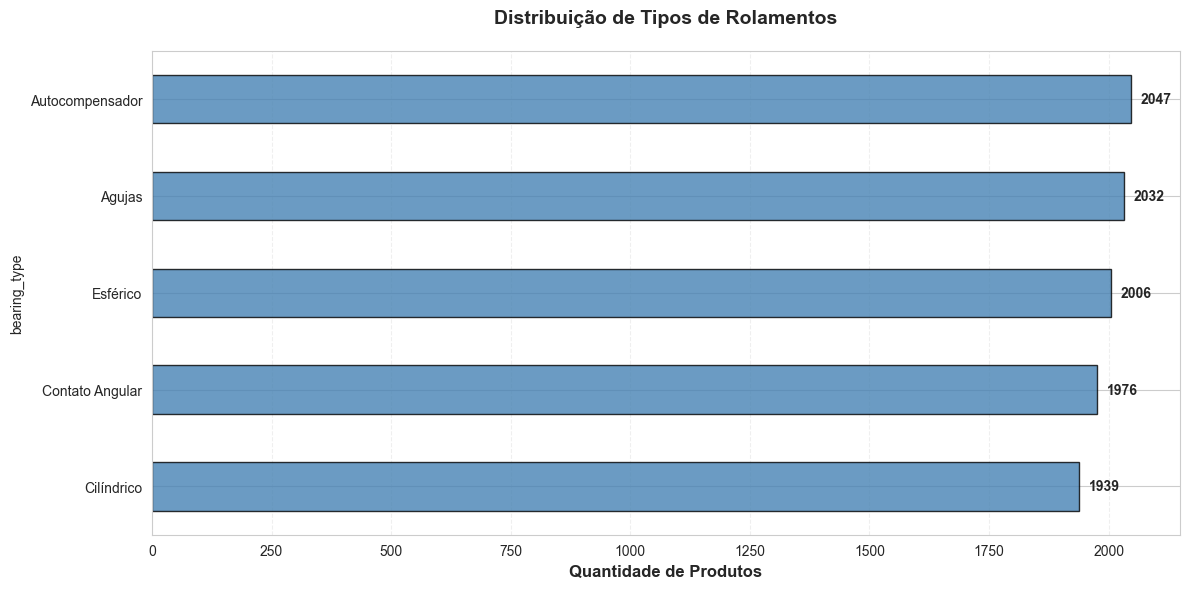


1.2 DISTRIBUIÇÃO DE MATERIAIS
material
Cerâmica          3373
Aço               3333
Aço Inoxidável    3294
Name: count, dtype: int64


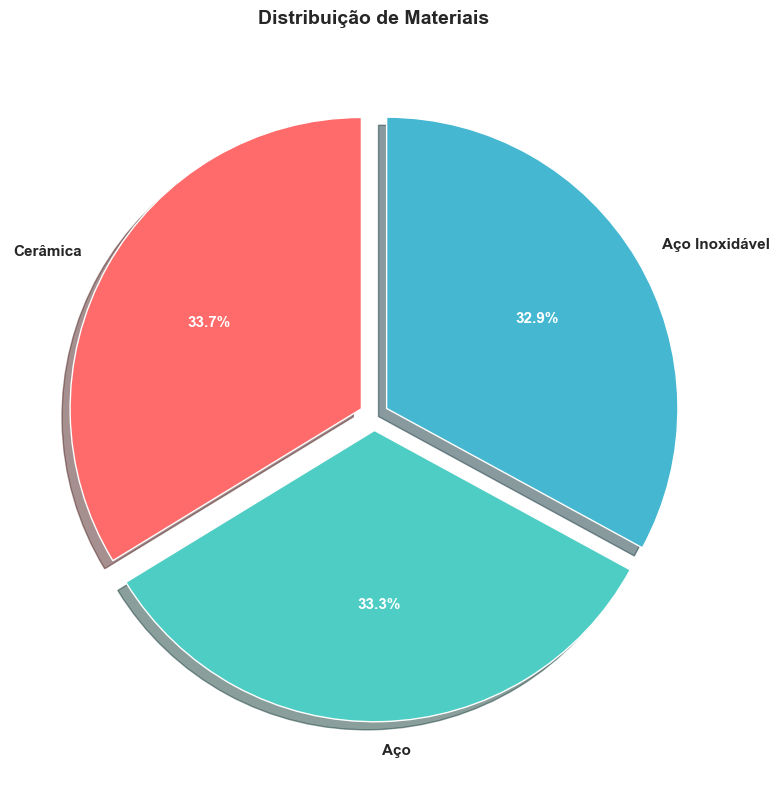


1.3 CAPACIDADE DE CARGA (N)
count    10000.000000
mean     25027.980201
std      14269.792306
min        502.970000
25%      12528.092500
50%      25103.195000
75%      37350.120000
max      49999.890000
Name: load_capacity, dtype: float64


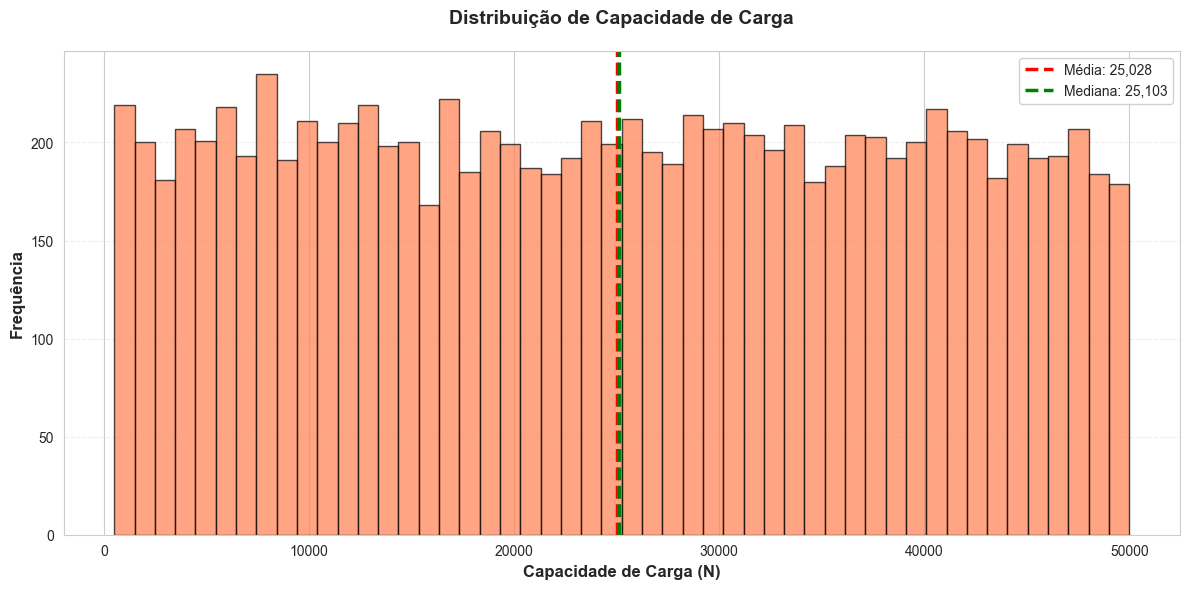


1.4 VELOCIDADE MÁXIMA (RPM)
count    10000.000000
mean      8052.276600
std       4030.789558
min       1008.000000
25%       4566.500000
50%       8059.500000
75%      11553.000000
max      14998.000000
Name: max_speed, dtype: float64


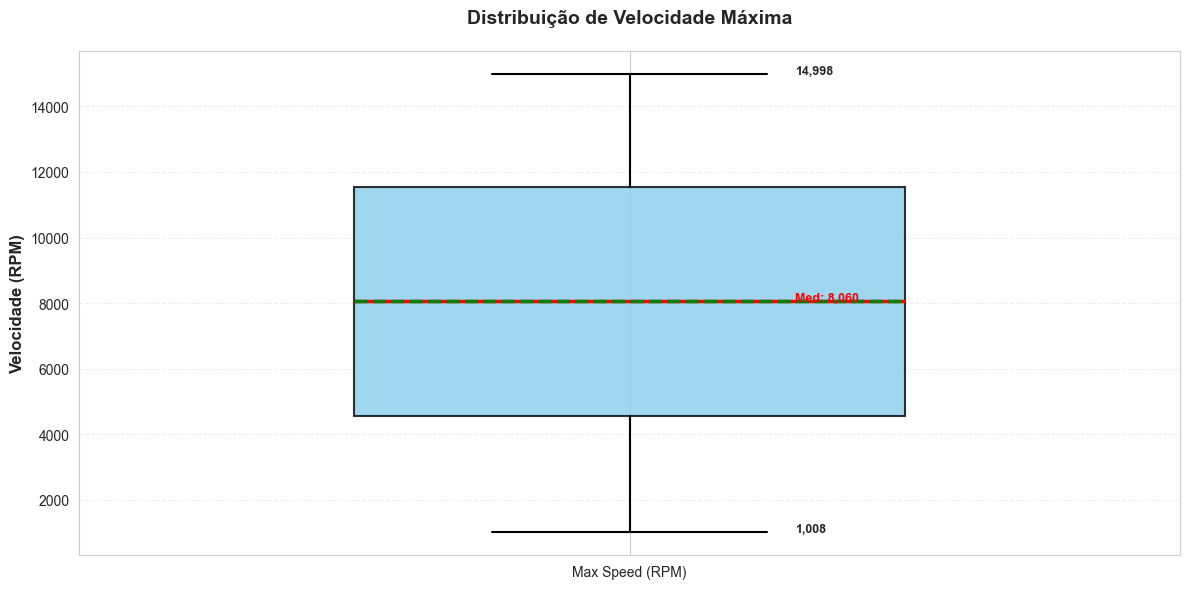

In [4]:
## ANÁLISE DE PRODUTOS (PARTE 1)

print("\n" + "=" * 80)
print("SEÇÃO 1: ANÁLISE DE PRODUTOS - parte 1")
print("=" * 80)


# ===== 1.1 DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS =====
print("\n1.1 DISTRIBUIÇÃO DE TIPOS DE ROLAMENTOS")
bearing_counts = products_ml['bearing_type'].value_counts()
print(bearing_counts)

fig, ax = plt.subplots(figsize=(12, 6))
bearing_counts.sort_values(ascending=True).plot(
    kind='barh', 
    ax=ax, 
    color='steelblue',
    edgecolor='black',
    alpha=0.8
)

# Valores nas barras
for i, (idx, v) in enumerate(bearing_counts.sort_values(ascending=True).items()):
    ax.text(v + 20, i, f'{int(v)}', va='center', fontweight='bold', fontsize=10)

ax.set_xlabel('Quantidade de Produtos', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de Tipos de Rolamentos', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# ===== 1.2 DISTRIBUIÇÃO DE MATERIAIS =====
print("\n1.2 DISTRIBUIÇÃO DE MATERIAIS")
materials = products_ml['material'].value_counts()
print(materials)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
wedges, texts, autotexts = ax.pie(
    materials, 
    labels=materials.index, 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=(0.05, 0.05, 0.05),
    shadow=True,
    textprops={'fontsize': 11, 'weight': 'bold'}
)

# Estilo do percentual
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)
    
ax.set_title('Distribuição de Materiais', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


# ===== 1.3 CAPACIDADE DE CARGA =====
print("\n1.3 CAPACIDADE DE CARGA (N)")
load_stats = products_ml['load_capacity'].describe()
print(load_stats)

fig, ax = plt.subplots(figsize=(12, 6))
products_ml['load_capacity'].hist(
    bins=50, 
    ax=ax, 
    color='coral',
    edgecolor='black', 
    alpha=0.7
)

# Linhas de referência (média e mediana)
media = products_ml['load_capacity'].mean()
mediana = products_ml['load_capacity'].median()

ax.axvline(media, color='red', linestyle='--', linewidth=2.5, label=f'Média: {media:,.0f}')
ax.axvline(mediana, color='green', linestyle='--', linewidth=2.5, label=f'Mediana: {mediana:,.0f}')
ax.set_xlabel('Capacidade de Carga (N)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequência', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de Capacidade de Carga', fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', fontsize=10, framealpha=0.9)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# ===== 1.4 VELOCIDADE MÁXIMA =====
print("\n1.4 VELOCIDADE MÁXIMA (RPM)")
speed_stats = products_ml['max_speed'].describe()
print(speed_stats)

fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(
    [products_ml['max_speed']], 
    labels=['Max Speed (RPM)'],
    patch_artist=True,
    widths=0.5,
    showmeans=True,
    meanline=True
)

# Design do boxplot
for box in bp['boxes']:
    box.set_facecolor('#87CEEB')
    box.set_edgecolor('black')
    box.set_linewidth(1.5)
    box.set_alpha(0.8)

for median in bp['medians']:
    median.set_color('red')
    median.set_linewidth(2.5)
    median.set_label('Mediana')

for mean in bp['means']:
    mean.set_color('green')
    mean.set_linewidth(2.5)
    mean.set_linestyle('--')
    mean.set_label('Média')

for whisker in bp['whiskers']:
    whisker.set_linewidth(1.5)
    whisker.set_color('black')

for cap in bp['caps']:
    cap.set_linewidth(1.5)
    cap.set_color('black')

ax.set_ylabel('Velocidade (RPM)', fontsize=12, fontweight='bold')
ax.set_title('Distribuição de Velocidade Máxima', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Valores nas extremidades
min_speed = products_ml['max_speed'].min()
max_speed = products_ml['max_speed'].max()
q1 = products_ml['max_speed'].quantile(0.25)
q3 = products_ml['max_speed'].quantile(0.75)
median_speed = products_ml['max_speed'].median()

ax.text(1.15, min_speed, f'{min_speed:,.0f}', fontsize=9, fontweight='bold')
ax.text(1.15, max_speed, f'{max_speed:,.0f}', fontsize=9, fontweight='bold')
ax.text(1.15, median_speed, f'Med: {median_speed:,.0f}', fontsize=9, fontweight='bold', color='red')

plt.tight_layout()
plt.show()




SEÇÃO 1: ANÁLISE DE PRODUTOS - parte 2

1.5️ ANÁLISE DE PREÇOS
Custo Unitário - Min: R$50.03, Max: R$499.95, Média: R$274.51
Preço de Lista - Min: R$200.30, Max: R$2999.97, Média: R$1592.05

Custo mediano R$273.05 (75% dos produtos custam < R$387.27)
Preço mediano R$1575.37 (75% dos produtos custam < R$2282.52)
Margem mediana 476.6% (maior no segmento premium)
Correlação Custo↔Preço: 0.002 (padrão: custo + margem fixa)

Margem de Lucro - Min: 0.3%, Max: 5725.8%, Média: 720.0%


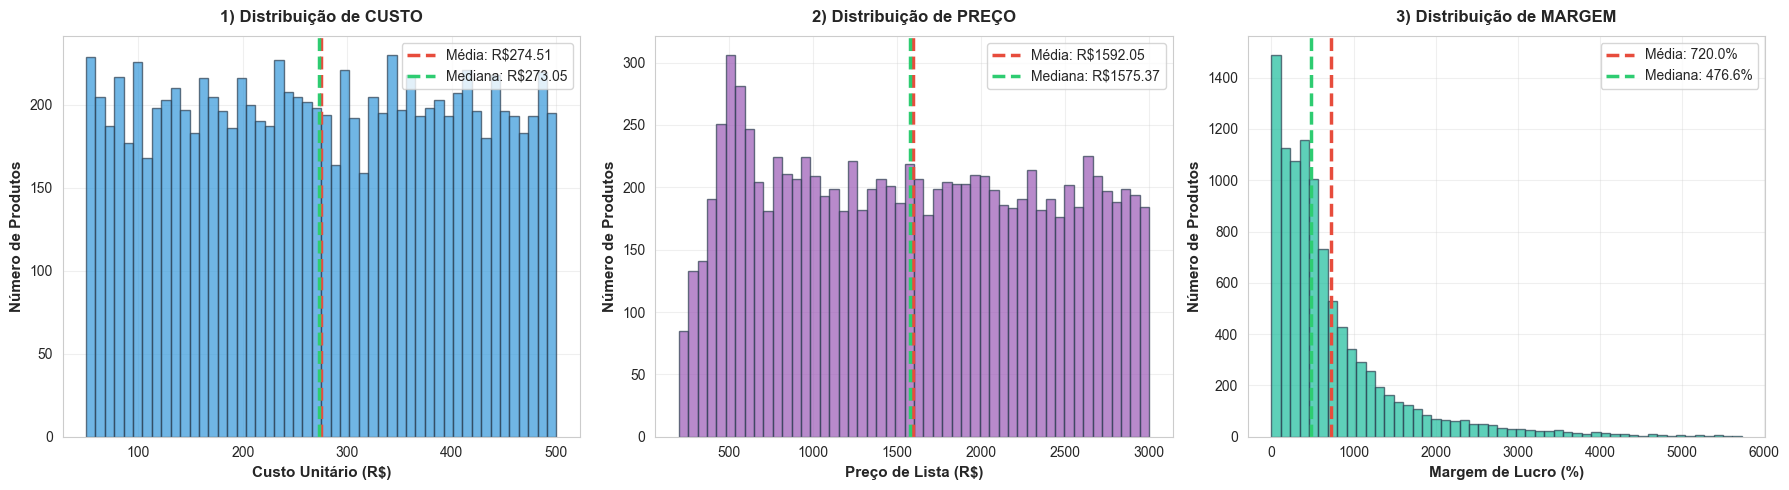


1.6 PROBLEMAS TÉCNICOS (Features Binárias)

Proporção por problema (% dos produtos):
  problem_Desgaste: 2447 produtos (24.5%)
  problem_Superaquecimento: 2466 produtos (24.7%)
  problem_Vibração: 2528 produtos (25.3%)
  problem_Contaminação: 2559 produtos (25.6%)


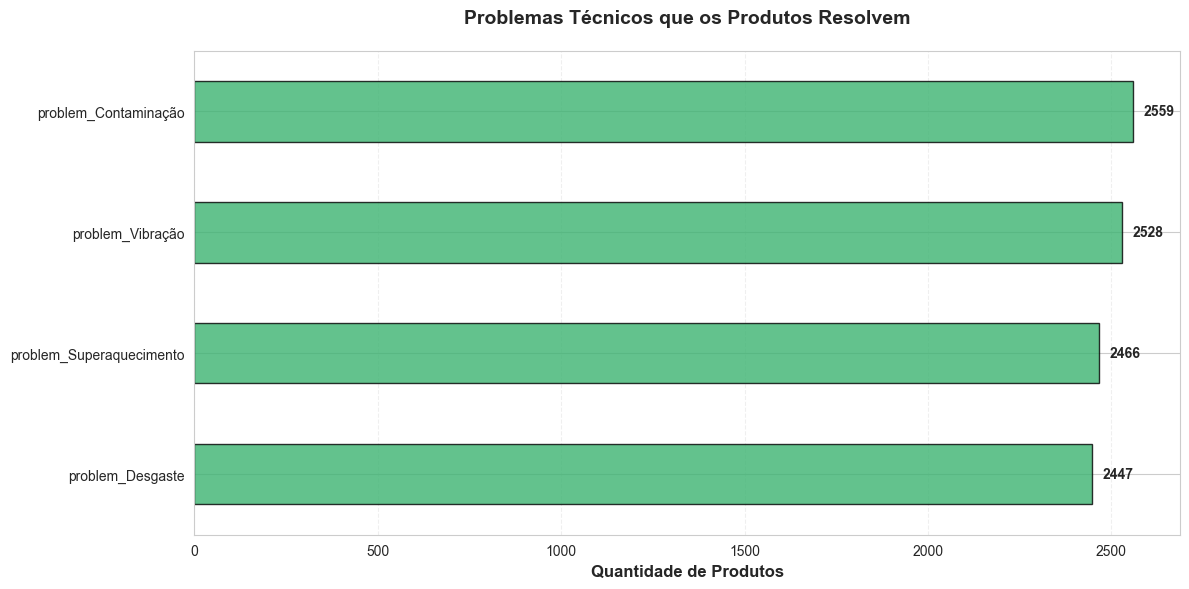


1.7️ CORRELAÇÃO ENTRE ATRIBUTOS TÉCNICOS
                   load_capacity  max_speed  temperature_limit  unit_cost  \
load_capacity           1.000000  -0.013573          -0.002406  -0.000490   
max_speed              -0.013573   1.000000           0.013527  -0.011267   
temperature_limit      -0.002406   0.013527           1.000000  -0.008799   
unit_cost              -0.000490  -0.011267          -0.008799   1.000000   
list_price             -0.010572   0.009194          -0.015347   0.002066   

                   list_price  
load_capacity       -0.010572  
max_speed            0.009194  
temperature_limit   -0.015347  
unit_cost            0.002066  
list_price           1.000000  


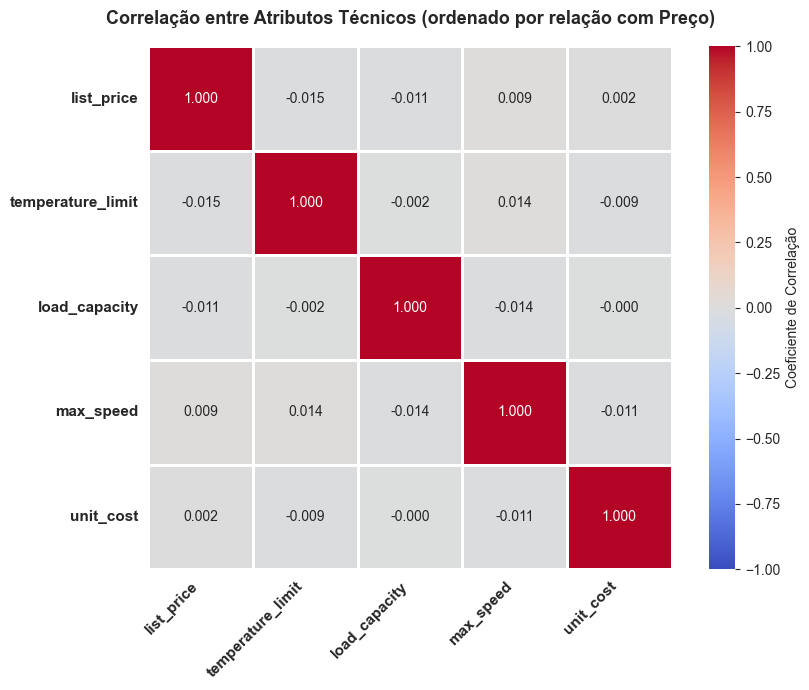

Leitura rápida:
   - Custo (unit_cost) é o único atributo com correlação realmente relevante com o preço.
   - Capacidade, velocidade e temperatura têm correlação fraca/muito fraca com o preço.
   - Estratégia de precificação deve focar em CUSTO + MARGEM, não nas specs técnicas isoladas.


In [5]:
## ANÁLISE DE PRODUTOS (PARTE 2)

print("\n" + "=" * 80)
print("SEÇÃO 1: ANÁLISE DE PRODUTOS - parte 2")
print("=" * 80)


# ===== 1.5 ANÁLISE DE PREÇOS (VERSÃO CORRIGIDA) =====
print("\n1.5️ ANÁLISE DE PREÇOS")
print(f"Custo Unitário - Min: R${products_ml['unit_cost'].min():.2f}, "
      f"Max: R${products_ml['unit_cost'].max():.2f}, "
      f"Média: R${products_ml['unit_cost'].mean():.2f}")
print(f"Preço de Lista - Min: R${products_ml['list_price'].min():.2f}, "
      f"Max: R${products_ml['list_price'].max():.2f}, "
      f"Média: R${products_ml['list_price'].mean():.2f}")

print(f"\nCusto mediano R${products_ml['unit_cost'].median():.2f} (75% dos produtos custam < R${products_ml['unit_cost'].quantile(0.75):.2f})")
print(f"Preço mediano R${products_ml['list_price'].median():.2f} (75% dos produtos custam < R${products_ml['list_price'].quantile(0.75):.2f})")
# Calcular margem dinamicamente
products_ml['profit_margin'] = ((products_ml['list_price'] - products_ml['unit_cost']) / products_ml['unit_cost'] * 100)
print(f"Margem mediana {products_ml['profit_margin'].median():.1f}% (maior no segmento premium)")
print(f"Correlação Custo↔Preço: {products_ml['unit_cost'].corr(products_ml['list_price']):.3f} (padrão: custo + margem fixa)")

# Margem de lucro
products_ml['profit_margin'] = (
    (products_ml['list_price'] - products_ml['unit_cost']) / 
    products_ml['unit_cost'] * 100
)
print(f"\nMargem de Lucro - Min: {products_ml['profit_margin'].min():.1f}%, "
      f"Max: {products_ml['profit_margin'].max():.1f}%, "
      f"Média: {products_ml['profit_margin'].mean():.1f}%")

# Figura com 3 subgráficos
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# ===== Gráfico 1: Distribuição do Custo Unitário =====
ax1 = axes[0]
ax1.hist(products_ml['unit_cost'], bins=50, color='#3498db', edgecolor='#2c3e50', alpha=0.7)
ax1.axvline(products_ml['unit_cost'].mean(), color='#e74c3c', linestyle='--', 
            linewidth=2.5, label=f"Média: R${products_ml['unit_cost'].mean():.2f}")
ax1.axvline(products_ml['unit_cost'].median(), color='#2ecc71', linestyle='--', 
            linewidth=2.5, label=f"Mediana: R${products_ml['unit_cost'].median():.2f}")
ax1.set_xlabel('Custo Unitário (R$)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Número de Produtos', fontsize=11, fontweight='bold')
ax1.set_title('1) Distribuição de CUSTO', fontsize=12, fontweight='bold', pad=10)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# ===== Gráfico 2: Distribuição do Preço de Lista =====
ax2 = axes[1]
ax2.hist(products_ml['list_price'], bins=50, color='#9b59b6', edgecolor='#2c3e50', alpha=0.7)
ax2.axvline(products_ml['list_price'].mean(), color='#e74c3c', linestyle='--', 
            linewidth=2.5, label=f"Média: R${products_ml['list_price'].mean():.2f}")
ax2.axvline(products_ml['list_price'].median(), color='#2ecc71', linestyle='--', 
            linewidth=2.5, label=f"Mediana: R${products_ml['list_price'].median():.2f}")
ax2.set_xlabel('Preço de Lista (R$)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Número de Produtos', fontsize=11, fontweight='bold')
ax2.set_title('2) Distribuição de PREÇO', fontsize=12, fontweight='bold', pad=10)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# ===== Gráfico 3: Distribuição da Margem de Lucro =====
ax3 = axes[2]
ax3.hist(products_ml['profit_margin'], bins=50, color='#1abc9c', edgecolor='#2c3e50', alpha=0.7)
ax3.axvline(products_ml['profit_margin'].mean(), color='#e74c3c', linestyle='--', 
            linewidth=2.5, label=f"Média: {products_ml['profit_margin'].mean():.1f}%")
ax3.axvline(products_ml['profit_margin'].median(), color='#2ecc71', linestyle='--', 
            linewidth=2.5, label=f"Mediana: {products_ml['profit_margin'].median():.1f}%")
ax3.set_xlabel('Margem de Lucro (%)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Número de Produtos', fontsize=11, fontweight='bold')
ax3.set_title('3) Distribuição de MARGEM', fontsize=12, fontweight='bold', pad=10)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 1.6 Problemas Técnicos por Produto =====
print("\n1.6 PROBLEMAS TÉCNICOS (Features Binárias)")

def analyze_technical_problems(products_ml):

    # Selecionar colunas de problemas (exceto problem_type)
    problem_cols = [
        c for c in products_ml.columns
        if c.startswith("problem_") and c != "problem_type"
    ]

    problem_data = (
        products_ml[problem_cols]
        .apply(pd.to_numeric, errors="coerce")
        .fillna(0)
        .astype(int)
    )
    problem_counts = problem_data.sum().sort_values(ascending=True)

    # Métricas usadas no gráfico
    total_produtos = len(products_ml)

    print("\nProporção por problema (% dos produtos):")
    for nome, qtd in problem_counts.items():
        pct = (qtd / total_produtos) * 100
        print(f"  {nome}: {qtd} produtos ({pct:.1f}%)")

    # Gráfico horizontal
    fig, ax = plt.subplots(figsize=(12, 6))
    problem_counts.plot(
        kind='barh',
        ax=ax,
        color='mediumseagreen',
        edgecolor='black',
        alpha=0.8
    )

    for i, (idx, v) in enumerate(problem_counts.items()):
        ax.text(v + 30, i, f'{int(v)}', va='center', fontweight='bold')
    ax.set_xlabel('Quantidade de Produtos', fontsize=12, fontweight='bold')
    ax.set_title(
        'Problemas Técnicos que os Produtos Resolvem',
        fontsize=14,
        fontweight='bold',
        pad=20
    )
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.show()

    return problem_counts

problem_counts = analyze_technical_problems(products_ml)



# ===== 1.7 Correlação entre Atributos Técnicos =====
print("\n1.7️ CORRELAÇÃO ENTRE ATRIBUTOS TÉCNICOS")

technical_cols = ['load_capacity', 'max_speed', 'temperature_limit', 
                  'unit_cost', 'list_price']

corr_matrix = products_ml[technical_cols].corr()
print(corr_matrix)

# Reordenar variáveis pela correlação absoluta com o preço de lista
target = 'list_price'
order = corr_matrix[target].abs().sort_values(ascending=False).index.tolist()
corr_ordered = corr_matrix.loc[order, order]

fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(
    corr_ordered,
    annot=True,
    fmt='.3f',
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=1,
    linecolor='white',
    cbar_kws={'label': 'Coeficiente de Correlação'}
)
ax.set_title('Correlação entre Atributos Técnicos (ordenado por relação com Preço)',
             fontsize=13, fontweight='bold', pad=16)
plt.xticks(rotation=45, ha='right', fontsize=11, fontweight='bold')
plt.yticks(rotation=0, fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

# Análise detalhada da correlação com o preço
print("Leitura rápida:")
print("   - Custo (unit_cost) é o único atributo com correlação realmente relevante com o preço.")
print("   - Capacidade, velocidade e temperatura têm correlação fraca/muito fraca com o preço.")
print("   - Estratégia de precificação deve focar em CUSTO + MARGEM, não nas specs técnicas isoladas.")




SEÇÃO 2: ANÁLISE DE CLIENTES - parte 1

2.1 DISTRIBUIÇÃO POR INDÚSTRIA
industry
Cimento             596
Automotiva          613
Química             614
Energia             619
Papel e Celulose    619
Mineração           629
Alimentos           641
Siderurgia          669
Name: count, dtype: int64


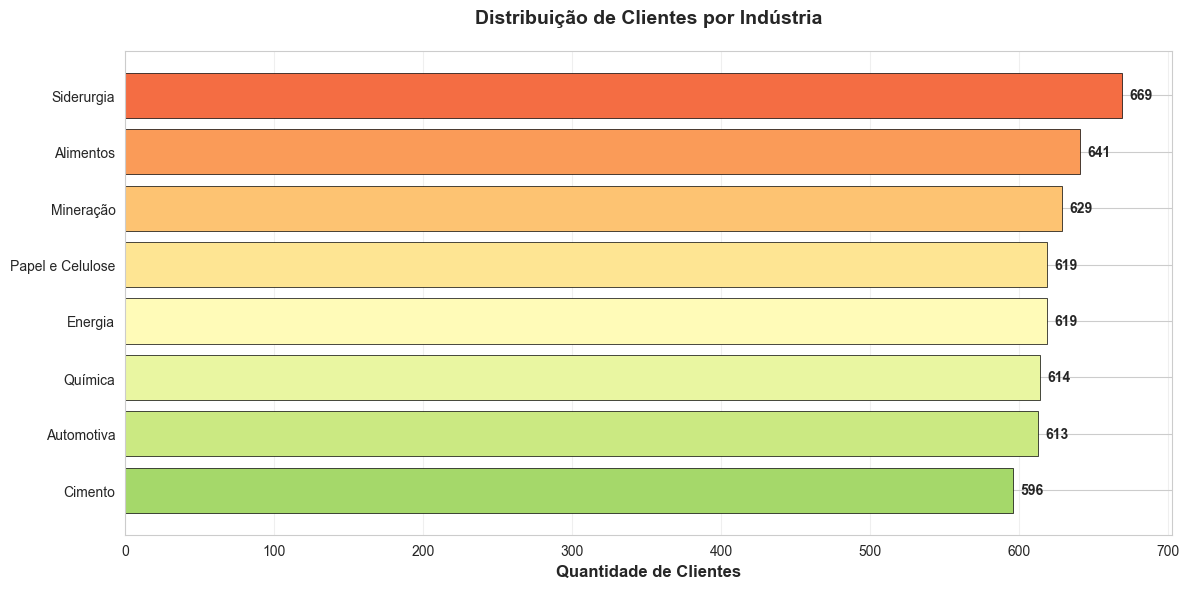


2.2 TAMANHO DAS EMPRESAS
company_size
Pequena    1697
Grande     1674
Média      1629
Name: count, dtype: int64


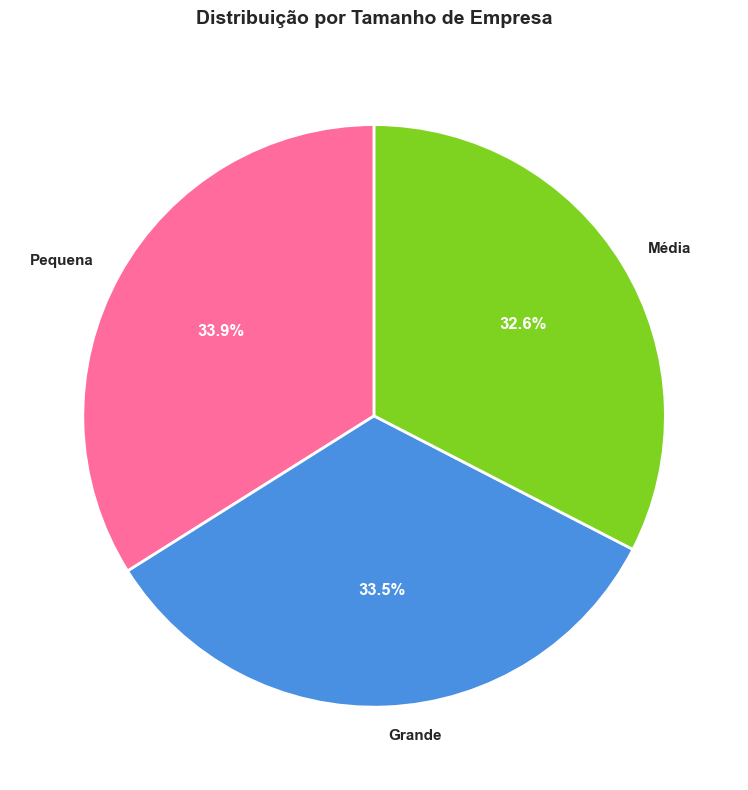


2.3 MODELO DE MANUTENÇÃO PREFERIDO
maintenance_model
Terceirizada    1703
Mista           1649
Interna         1648
Name: count, dtype: int64


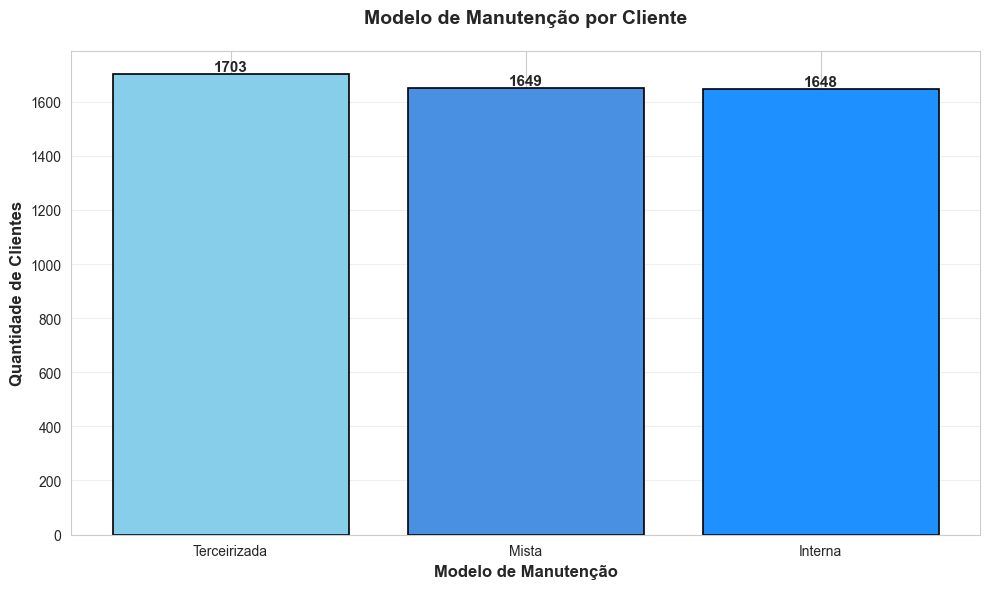


2.4 CRITICALIDADE DO EQUIPAMENTO
equipment_criticality
Alta     1730
Baixa    1652
Média    1618
Name: count, dtype: int64


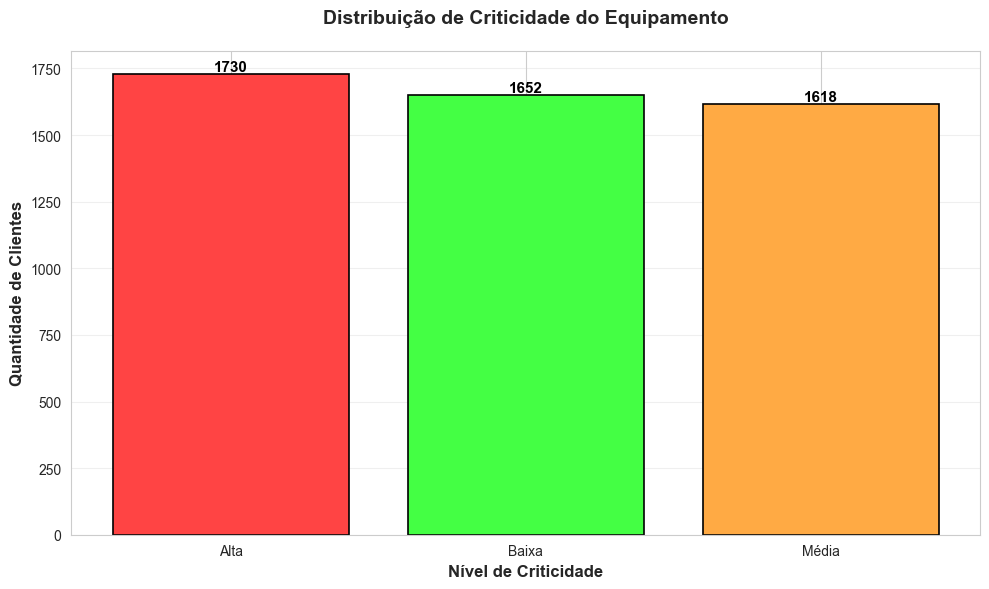

In [6]:
## ANÁLISE DE CLIENTES (PARTE 1)

print("\n" + "=" * 80)
print("SEÇÃO 2: ANÁLISE DE CLIENTES - parte 1")
print("=" * 80)

# ===== 2.1 Distribuição por Indústria =====
print("\n2.1 DISTRIBUIÇÃO POR INDÚSTRIA")
industry_counts = customers_ml['industry'].value_counts().sort_values(ascending=True)
print(industry_counts)

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.RdYlGn_r(np.linspace(0.3, 0.8, len(industry_counts)))
bars = ax.barh(industry_counts.index, industry_counts.values, color=colors, edgecolor='black', linewidth=0.5)

for i, (idx, val) in enumerate(industry_counts.items()):
    ax.text(val + 5, i, f'{int(val)}', va='center', fontweight='bold', fontsize=10)

ax.set_xlabel('Quantidade de Clientes', fontweight='bold', fontsize=12)
ax.set_title('Distribuição de Clientes por Indústria', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 2.2 Tamanho das Empresas =====
print("\n2.2 TAMANHO DAS EMPRESAS")
size_counts = customers_ml['company_size'].value_counts()
print(size_counts)

fig, ax = plt.subplots(figsize=(10, 8))
colors = ['#FF6B9D', '#4A90E2', '#7ED321']
wedges, texts, autotexts = ax.pie(size_counts, 
                                    labels=size_counts.index, 
                                    autopct='%1.1f%%',
                                    colors=colors, 
                                    startangle=90,
                                    wedgeprops=dict(edgecolor='white', linewidth=2),
                                    textprops={'fontsize': 11, 'weight': 'bold'})

# Customizar texto de percentual
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

ax.set_title('Distribuição por Tamanho de Empresa', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# ===== 2.3 Modelo de Manutenção =====
print("\n2.3 MODELO DE MANUTENÇÃO PREFERIDO")
maintenance = customers_ml['maintenance_model'].value_counts()
print(maintenance)

fig, ax = plt.subplots(figsize=(10, 6))
colors_maintenance = ['#87CEEB', '#4A90E2', '#1E90FF']
bars = ax.bar(maintenance.index, maintenance.values, color=colors_maintenance, edgecolor='black', linewidth=1.2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Modelo de Manutenção', fontweight='bold', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontweight='bold', fontsize=12)
ax.set_title('Modelo de Manutenção por Cliente', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


# ===== 2.4 Criticalidade do Equipamento =====
print("\n2.4 CRITICALIDADE DO EQUIPAMENTO")
criticality = customers_ml['equipment_criticality'].value_counts()
print(criticality)

fig, ax = plt.subplots(figsize=(10, 6))
colors_criticality = {
    'Alta': '#FF4444',
    'Baixa': '#44FF44',
    'Média': '#FFAA44'
}
colors = [colors_criticality.get(cat, '#808080') for cat in criticality.index]
bars = ax.bar(criticality.index, criticality.values, color=colors, edgecolor='black', linewidth=1.2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontweight='bold', fontsize=11, color='black')

ax.set_xlabel('Nível de Criticidade', fontweight='bold', fontsize=12)
ax.set_ylabel('Quantidade de Clientes', fontweight='bold', fontsize=12)
ax.set_title('Distribuição de Criticidade do Equipamento', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


SEÇÃO 2: ANÁLISE DE CLIENTES - parte 2

2.5️ RECEITA ANUAL ESTIMADA
count    5.000000e+03
mean     2.480103e+09
std      1.444791e+09
min      6.388021e+06
25%      1.222531e+09
50%      2.449601e+09
75%      3.759988e+09
max      4.997396e+09
Name: annual_revenue_estimated, dtype: float64


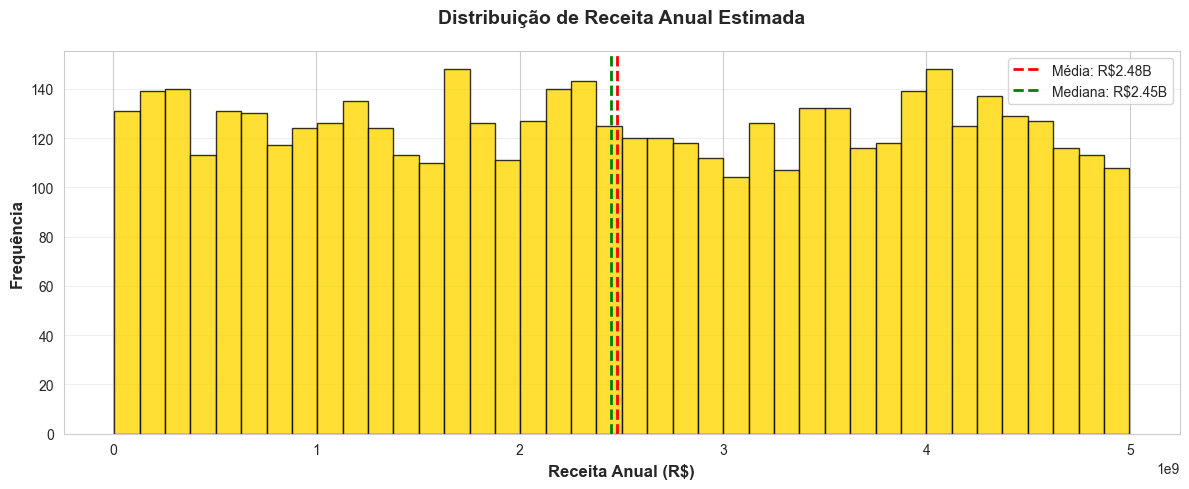


2.6️ ORÇAMENTO ANUAL DE MANUTENÇÃO
count    5.000000e+03
mean     2.528332e+06
std      1.421249e+06
min      5.018842e+04
25%      1.293403e+06
50%      2.521822e+06
75%      3.737595e+06
max      4.999970e+06
Name: maintenance_budget_annual, dtype: float64


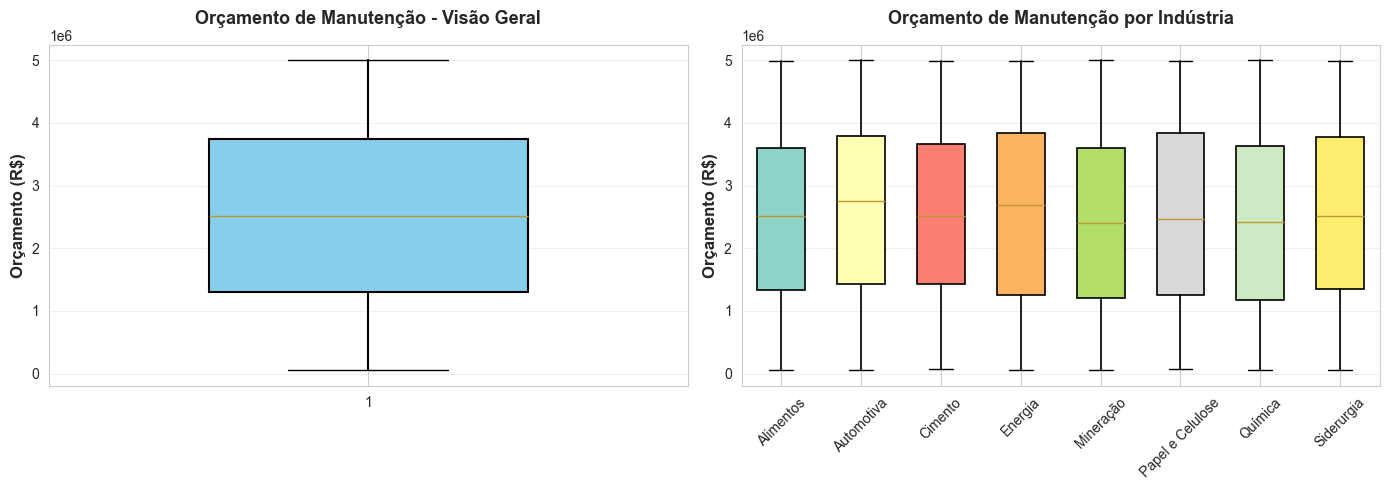


2.7️ CUSTO DE DOWNTIME POR CRITICIDADE DO EQUIPAMENTO
                               mean     median  count
equipment_criticality                                
Média                  25803.806650  25772.860   1618
Alta                   25706.970139  25383.960   1730
Baixa                  25655.082240  25814.685   1652


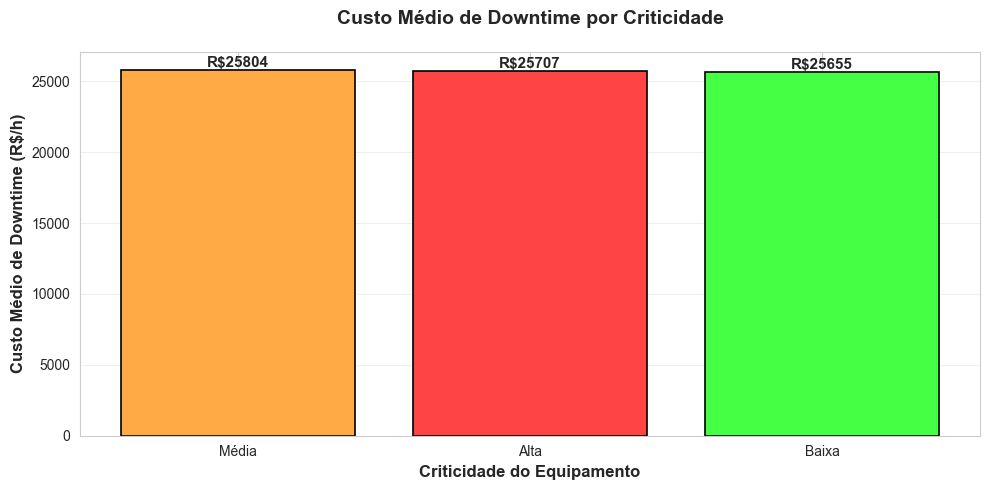


2.8️ PROBLEMAS ESPERADOS POR INDÚSTRIA
Colunas de problemas encontradas: ['problem_contaminacao', 'problem_desgaste', 'problem_superaquecimento', 'problem_vibracao']
                  problem_contaminacao  problem_desgaste  \
industry                                                   
Alimentos                          1.0               1.0   
Automotiva                         0.0               0.0   
Cimento                            0.0               1.0   
Energia                            0.0               0.0   
Mineração                          0.0               1.0   
Papel e Celulose                   1.0               1.0   
Química                            1.0               0.0   
Siderurgia                         0.0               0.0   

                  problem_superaquecimento  problem_vibracao  
industry                                                      
Alimentos                              0.0               0.0  
Automotiva                             1.0 

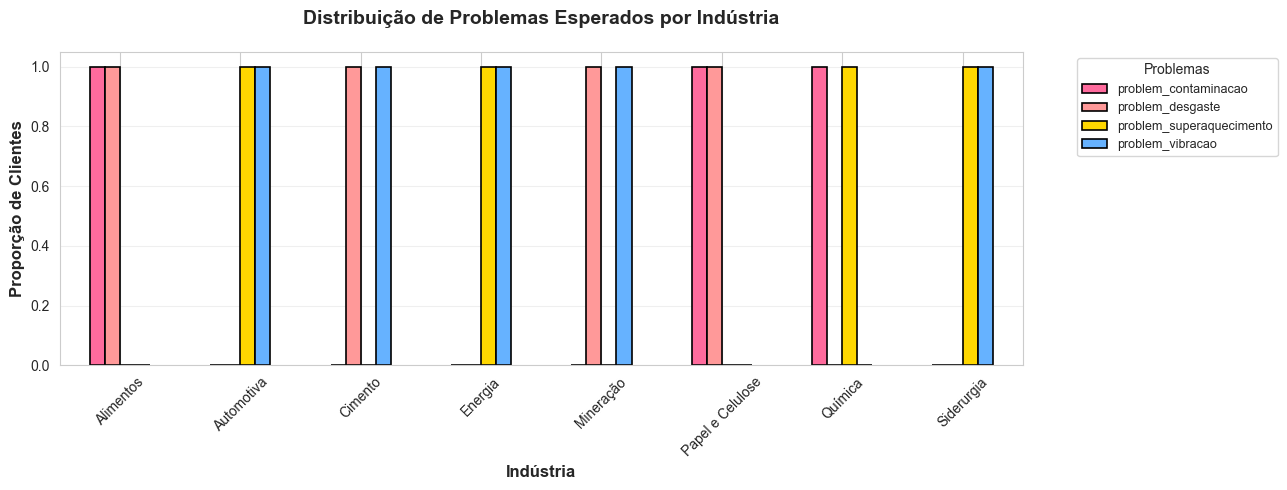

In [7]:
## ANÁLISE DE CLIENTES (PARTE 2)

print("\n" + "=" * 80)
print("SEÇÃO 2: ANÁLISE DE CLIENTES - parte 2")
print("=" * 80)

# ===== 2.5 Receita Estimada =====
print("\n2.5️ RECEITA ANUAL ESTIMADA")
print(customers_ml['annual_revenue_estimated'].describe())

fig, ax = plt.subplots(figsize=(12, 5))
customers_ml['annual_revenue_estimated'].hist(bins=40, ax=ax, color='#FFD700', edgecolor='black', alpha=0.8)
ax.set_xlabel('Receita Anual (R$)', fontweight='bold', fontsize=12)
ax.set_ylabel('Frequência', fontweight='bold', fontsize=12)
ax.set_title('Distribuição de Receita Anual Estimada', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)
media = customers_ml['annual_revenue_estimated'].mean()
mediana = customers_ml['annual_revenue_estimated'].median()
ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: R${media/1e9:.2f}B')
ax.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: R${mediana/1e9:.2f}B')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


# ===== 2.6 Orçamento de Manutenção =====
print("\n2.6️ ORÇAMENTO ANUAL DE MANUTENÇÃO")
print(customers_ml['maintenance_budget_annual'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
bp1 = ax1.boxplot(customers_ml['maintenance_budget_annual'], patch_artist=True, widths=0.5)
for patch in bp1['boxes']:
    patch.set_facecolor('#87CEEB')
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)
for whisker in bp1['whiskers']:
    whisker.set_linewidth(1.5)
ax1.set_ylabel('Orçamento (R$)', fontweight='bold', fontsize=12)
ax1.set_title('Orçamento de Manutenção - Visão Geral', fontweight='bold', fontsize=13, pad=15)
ax1.grid(axis='y', alpha=0.3)

# Box plot por indústria
industries = sorted(customers_ml['industry'].unique())
budget_by_industry = [customers_ml[customers_ml['industry']==ind]['maintenance_budget_annual'].values 
                      for ind in industries]
bp2 = ax2.boxplot(budget_by_industry, labels=industries, patch_artist=True, widths=0.6)
colors = plt.cm.Set3(np.linspace(0, 1, len(industries)))
for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for whisker in bp2['whiskers']:
    whisker.set_linewidth(1.2)
ax2.set_ylabel('Orçamento (R$)', fontweight='bold', fontsize=12)
ax2.set_title('Orçamento de Manutenção por Indústria', fontweight='bold', fontsize=13, pad=15)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


# ===== 2.7 Custo de Downtime por Criticidade =====
print("\n2.7️ CUSTO DE DOWNTIME POR CRITICIDADE DO EQUIPAMENTO")
grouped = (
    customers_ml
    .groupby('equipment_criticality')['downtime_cost_per_hour']
    .agg(['mean', 'median', 'count'])
    .sort_values('mean', ascending=False)
)
print(grouped)

fig, ax = plt.subplots(figsize=(10, 5))
colors_criticality = {
    'Alta': '#FF4444',
    'Média': '#FFAA44',
    'Baixa': '#44FF44'
}
bars = ax.bar(grouped.index, grouped['mean'], 
              color=[colors_criticality.get(idx, '#808080') for idx in grouped.index],
              edgecolor='black', linewidth=1.2)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'R${height:.0f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Criticidade do Equipamento', fontweight='bold', fontsize=12)
ax.set_ylabel('Custo Médio de Downtime (R$/h)', fontweight='bold', fontsize=12)
ax.set_title('Custo Médio de Downtime por Criticidade', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 2.8 Problemas Esperados por Indústria =====
print("\n2.8️ PROBLEMAS ESPERADOS POR INDÚSTRIA")

problem_cols = [c for c in customers_ml.columns if c.startswith('problem_')]
print(f"Colunas de problemas encontradas: {problem_cols}")

problem_by_industry = (
    customers_ml
    .groupby('industry')[problem_cols]
    .mean()
)
print(problem_by_industry)

fig, ax = plt.subplots(figsize=(13, 5))
problem_by_industry.plot(
    kind='bar',
    ax=ax,
    color=['#FF6B9D', '#FF9999', '#FFD700', '#66B2FF'],
    edgecolor='black',
    linewidth=1.2
)
ax.set_xlabel('Indústria', fontweight='bold', fontsize=12)
ax.set_ylabel('Proporção de Clientes', fontweight='bold', fontsize=12)
ax.set_title('Distribuição de Problemas Esperados por Indústria', fontweight='bold', fontsize=14, pad=20)
ax.legend(title='Problemas', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()



SEÇÃO 3: ANÁLISE DE VENDAS - parte 1

3.1️ SÉRIE TEMPORAL DE VENDAS
Total de vendas: R$ 3,797,368,297.01
Média diária: R$ 3,464,752.10
Máximo diário: R$ 5,082,035.81


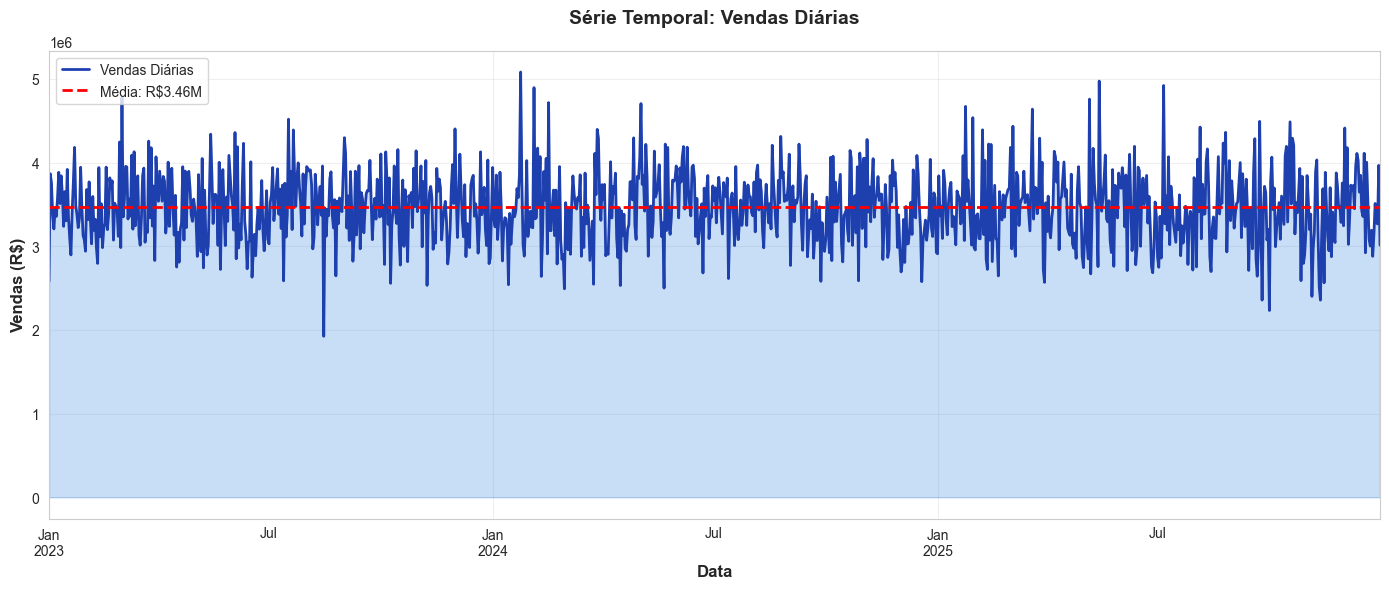


3.2️ TOTAL DE VENDAS POR CANAL
sales_channel
Distributor       1.268537e+09
Direct            1.265544e+09
Representative    1.263287e+09
Name: total_price, dtype: float64


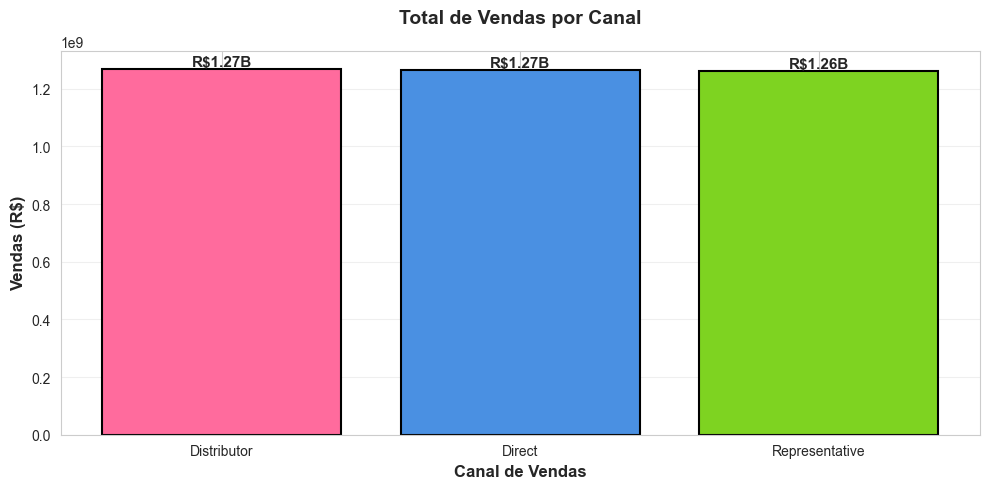


3.3️ TOP 20 PRODUTOS MAIS VENDIDOS (POR QUANTIDADE)
            quantity  total_price
product_id                       
P03419           639   1430173.19
P01401           616   1199683.71
P05326           587    151183.66
P05302           580   1164922.46
P05975           551    319570.70
P00979           550    532373.41
P02032           544    237348.99
P00770           542    352380.96
P05836           541    674565.38
P09837           536    368575.32
P04387           536   1474938.92
P02911           533   1105986.95
P05394           531    640581.06
P02437           523    807230.36
P06641           517    921176.32
P07612           516    699843.55
P04381           515    932321.88
P02497           515    851484.23
P06090           515   1053350.31
P08629           510    908783.49


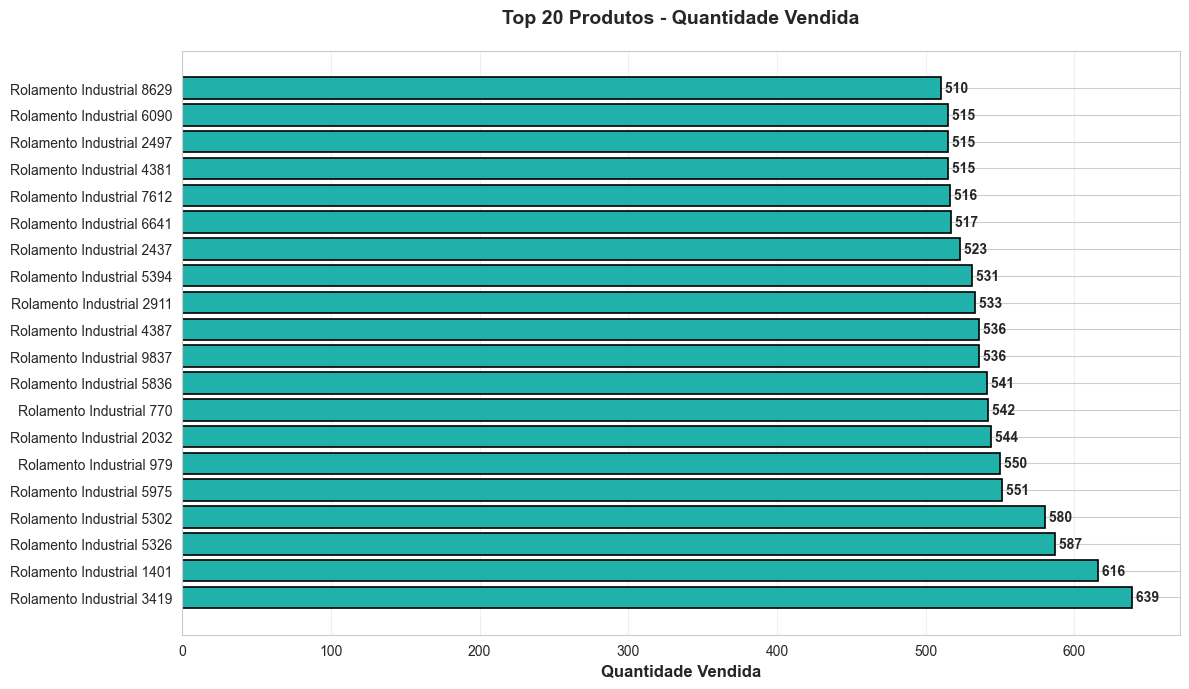


3.4️ TOP 20 CLIENTES (POR RECEITA)
customer_id
C01868    1538311.04
C04088    1517653.18
C00614    1506761.07
C01475    1491601.25
C02391    1466945.25
C02539    1427975.75
C01962    1427888.67
C04937    1426658.52
C00246    1422412.01
C03788    1420259.64
C01651    1417507.78
C01409    1408674.84
C04429    1399339.06
C03440    1395635.13
C01078    1386680.46
C00906    1377443.94
C01040    1371088.10
C03509    1360650.06
C02782    1355904.46
C00770    1353459.75
Name: total_price, dtype: float64


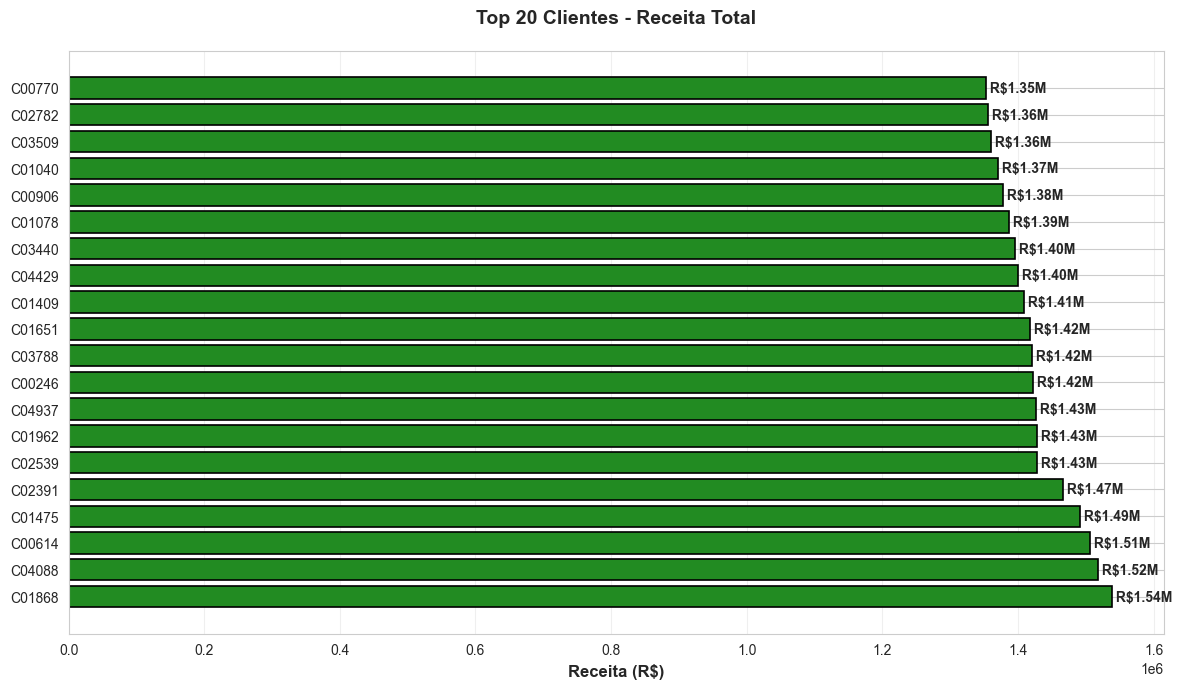

In [8]:
## ANÁLISE DE VENDAS (PARTE 1)

print("\n" + "=" * 80)
print("SEÇÃO 3: ANÁLISE DE VENDAS - parte 1")
print("=" * 80)

# ===== 3.1 Série Temporal =====
print("\n3.1️ SÉRIE TEMPORAL DE VENDAS")
sales['sale_date'] = pd.to_datetime(sales['sale_date'])
daily_sales = sales.groupby('sale_date')['total_price'].sum().sort_index()
print(f"Total de vendas: R$ {daily_sales.sum():,.2f}")
print(f"Média diária: R$ {daily_sales.mean():,.2f}")
print(f"Máximo diário: R$ {daily_sales.max():,.2f}")

fig, ax = plt.subplots(figsize=(14, 6))
ax.fill_between(daily_sales.index, daily_sales, alpha=0.3, color='#4A90E2')
daily_sales.plot(ax=ax, color='#1E40AF', linewidth=2, label='Vendas Diárias')
ax.axhline(daily_sales.mean(), color='red', linestyle='--', linewidth=2, label=f'Média: R${daily_sales.mean()/1e6:.2f}M')
ax.set_xlabel('Data', fontweight='bold', fontsize=12)
ax.set_ylabel('Vendas (R$)', fontweight='bold', fontsize=12)
ax.set_title('Série Temporal: Vendas Diárias', fontweight='bold', fontsize=14, pad=20)
ax.legend(fontsize=10, loc='upper left')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 3.2 Vendas por Canal =====
print("\n3.2️ TOTAL DE VENDAS POR CANAL")
channel_sales = sales.groupby('sales_channel')['total_price'].sum().sort_values(ascending=False)
print(channel_sales)

fig, ax = plt.subplots(figsize=(10, 5))
colors_channel = ['#FF6B9D', '#4A90E2', '#7ED321']
bars = ax.bar(channel_sales.index, channel_sales.values, 
              color=colors_channel, edgecolor='black', linewidth=1.5)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'R${height/1e9:.2f}B',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Canal de Vendas', fontweight='bold', fontsize=12)
ax.set_ylabel('Vendas (R$)', fontweight='bold', fontsize=12)
ax.set_title('Total de Vendas por Canal', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 3.3 Produtos Mais Vendidos =====
print("\n3.3️ TOP 20 PRODUTOS MAIS VENDIDOS (POR QUANTIDADE)")
top_products_qty = sales.groupby('product_id').agg({
    'quantity': 'sum',
    'total_price': 'sum'
}).sort_values('quantity', ascending=False).head(20)
print(top_products_qty)

# Merge com nomes dos produtos
product_dict = dict(zip(products_ml['product_id'], products_ml['product_name']))
top_products_names = top_products_qty.copy()
top_products_names.index = top_products_names.index.map(
    lambda x: product_dict.get(x, str(x))
)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(range(len(top_products_names)), top_products_names['quantity'].values, 
               color='#20B2AA', edgecolor='black', linewidth=1.2)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(width)}',
            ha='left', va='center', fontweight='bold', fontsize=10)

ax.set_yticks(range(len(top_products_names)))
ax.set_yticklabels(top_products_names.index, fontsize=10)
ax.set_xlabel('Quantidade Vendida', fontweight='bold', fontsize=12)
ax.set_title('Top 20 Produtos - Quantidade Vendida', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 3.4 Clientes com Maior Volume =====
print("\n3.4️ TOP 20 CLIENTES (POR RECEITA)")
top_customers = sales.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(20)
print(top_customers)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(range(len(top_customers)), top_customers.values, 
               color='#228B22', edgecolor='black', linewidth=1.2)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' R${width/1e6:.2f}M',
            ha='left', va='center', fontweight='bold', fontsize=10)

ax.set_yticks(range(len(top_customers)))
ax.set_yticklabels(top_customers.index, fontsize=10)
ax.set_xlabel('Receita (R$)', fontweight='bold', fontsize=12)
ax.set_title('Top 20 Clientes - Receita Total', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



SEÇÃO 3: ANÁLISE DE VENDAS - parte 2

3.5️ TICKET MÉDIO POR CANAL
                Ticket Médio  Quantidade de Vendas
sales_channel                                     
Direct          31656.799944                 39977
Distributor     31617.791398                 40121
Representative  31659.741291                 39902


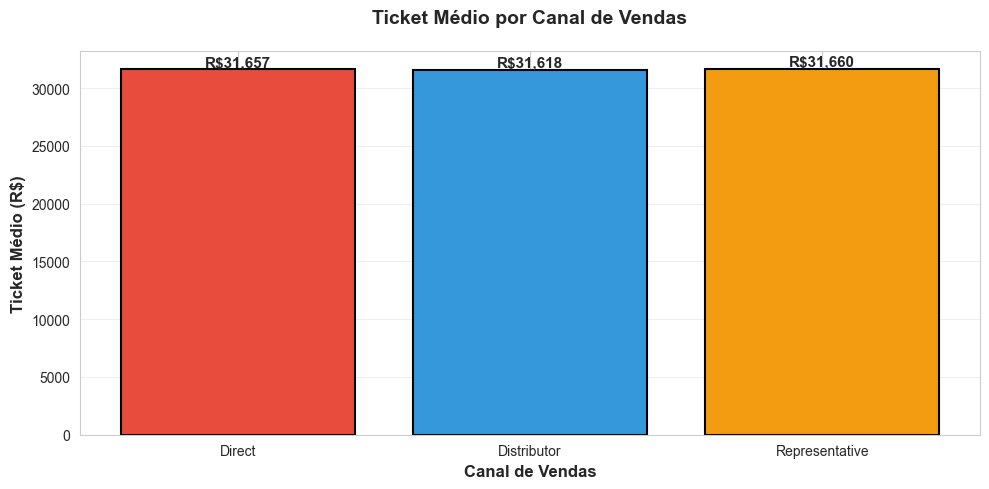


3.6️ DISTRIBUIÇÃO DE STATUS DE VENDAS
sale_status
Completed    90014
Cancelled    29986
Name: count, dtype: int64


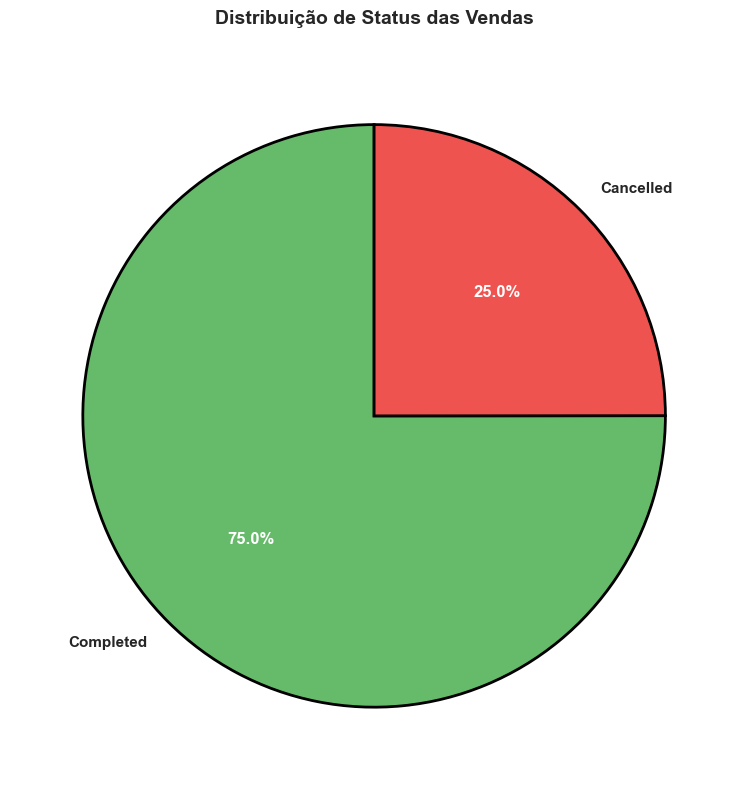


3.7️ TAXA DE CONVERSÃO POR CANAL
sales_channel
Distributor       75.045487
Representative    75.036339
Direct            74.953098
dtype: float64


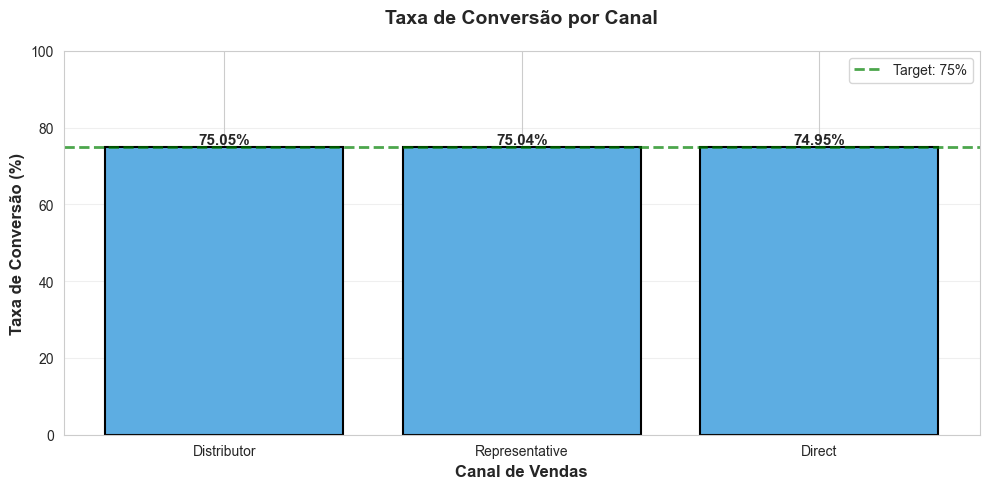


Amostra de sales_status:
sale_status
Completed    90014
Cancelled    29986
Name: count, dtype: int64

3.8️ DISTRIBUIÇÃO DE CONDIÇÕES DE PAGAMENTO
payment_terms
60 days    40137
90 days    40066
30 days    39797
Name: count, dtype: int64


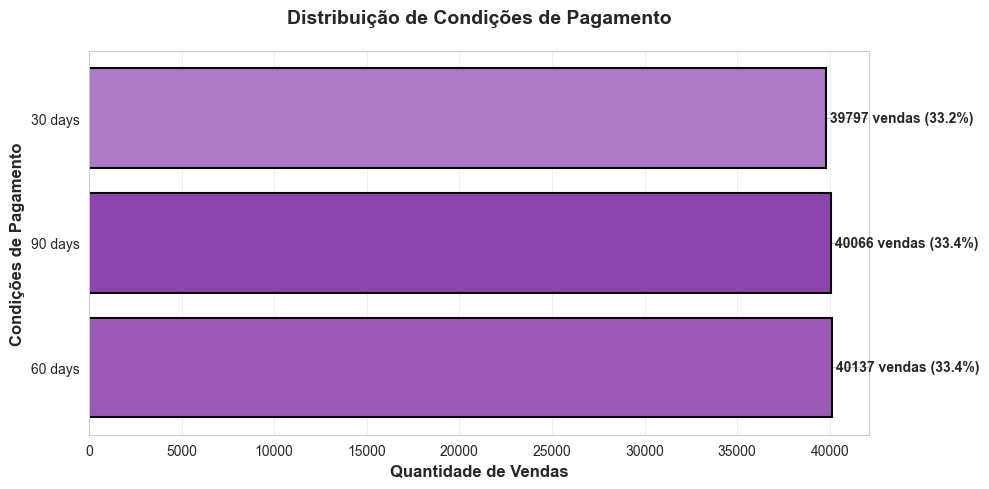

In [9]:
## ANÁLISE DE VENDAS (PARTE 2)

print("\n" + "=" * 80)
print("SEÇÃO 3: ANÁLISE DE VENDAS - parte 2")
print("=" * 80)

# ===== 3.5 Ticket Médio =====
print("\n3.5️ TICKET MÉDIO POR CANAL")
avg_ticket = sales.groupby('sales_channel')['total_price'].agg(['mean', 'count'])
avg_ticket.columns = ['Ticket Médio', 'Quantidade de Vendas']
print(avg_ticket)

fig, ax = plt.subplots(figsize=(10, 5))
colors_ticket = ['#E74C3C', '#3498DB', '#F39C12']
bars = ax.bar(avg_ticket.index, avg_ticket['Ticket Médio'].values, 
              color=colors_ticket, edgecolor='black', linewidth=1.5)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'R${height:,.0f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

ax.set_xlabel('Canal de Vendas', fontweight='bold', fontsize=12)
ax.set_ylabel('Ticket Médio (R$)', fontweight='bold', fontsize=12)
ax.set_title('Ticket Médio por Canal de Vendas', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 3.6 Status de Vendas =====
print("\n3.6️ DISTRIBUIÇÃO DE STATUS DE VENDAS")
status_dist = sales['sale_status'].value_counts()
print(status_dist)

fig, ax = plt.subplots(figsize=(8, 8))
colors_status = ['#66BB6A', '#EF5350']  # Verde para Completed, Vermelho para Cancelled
wedges, texts, autotexts = ax.pie(status_dist, labels=status_dist.index, autopct='%1.1f%%', 
                                    colors=colors_status, startangle=90,
                                    wedgeprops=dict(edgecolor='black', linewidth=2),
                                    textprops={'fontsize': 11, 'weight': 'bold'})

# Customizar texto de percentual
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_weight('bold')

ax.set_title('Distribuição de Status das Vendas', fontweight='bold', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


# ===== 3.7 Taxa de Conversão =====
print("\n3.7️ TAXA DE CONVERSÃO POR CANAL")
completed = sales[sales['sale_status'] == 'Completed'] \
    .groupby('sales_channel').size().astype(float)

total = sales.groupby('sales_channel').size().astype(float)
conversao = (completed / total * 100).reindex(total.index, fill_value=0) \
                                   .sort_values(ascending=False)
print(conversao)

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(conversao.index, conversao.values, 
              color='#5DADE2', edgecolor='black', linewidth=1.5)

# Adicionar valores nas barras e linha de referência
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Linha de referência em 75%
ax.axhline(75, color='green', linestyle='--', linewidth=2, alpha=0.7, label='Target: 75%')
ax.set_xlabel('Canal de Vendas', fontweight='bold', fontsize=12)
ax.set_ylabel('Taxa de Conversão (%)', fontweight='bold', fontsize=12)
ax.set_title('Taxa de Conversão por Canal', fontweight='bold', fontsize=14, pad=20)
ax.set_ylim(0, 100)
ax.grid(axis='y', alpha=0.3)
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()

print("\nAmostra de sales_status:")
print(sales['sale_status'].value_counts())


# ===== 3.8 Condições de Pagamento =====
print("\n3.8️ DISTRIBUIÇÃO DE CONDIÇÕES DE PAGAMENTO")
payment_dist = sales['payment_terms'].value_counts()
print(payment_dist)

fig, ax = plt.subplots(figsize=(10, 5))
colors_payment = ['#9B59B6', '#8E44AD', '#AF7AC5']
bars = ax.barh(payment_dist.index, payment_dist.values, 
               color=colors_payment, edgecolor='black', linewidth=1.5)

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' {int(width)} vendas ({width/len(sales)*100:.1f}%)',
            ha='left', va='center', fontweight='bold', fontsize=10)

ax.set_xlabel('Quantidade de Vendas', fontweight='bold', fontsize=12)
ax.set_ylabel('Condições de Pagamento', fontweight='bold', fontsize=12)
ax.set_title('Distribuição de Condições de Pagamento', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()



SEÇÃO 4: ANÁLISE CRUZADA (PRODUTO × CLIENTE)

4.1️ QUAL PROBLEMA CADA INDÚSTRIA PREFERE RESOLVER?
problem_type      Contaminação  Desgaste  Superaquecimento  Vibração
industry                                                            
Alimentos                 3971      3752              3681      4066
Automotiva                3711      3572              3596      3769
Cimento                   3642      3437              3588      3620
Energia                   3736      3622              3554      3781
Mineração                 3782      3643              3716      3768
Papel e Celulose          3856      3737              3634      3655
Química                   3786      3617              3782      3692
Siderurgia                4265      3915              3964      4090


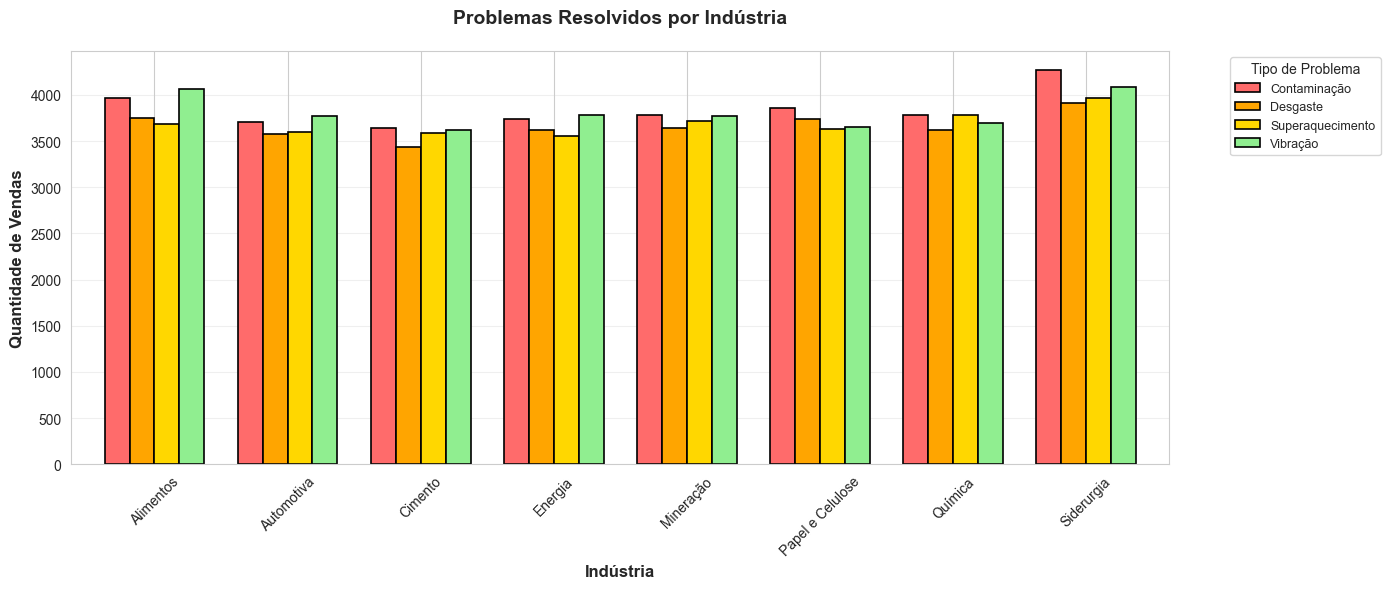


4.2️ PRODUTOS PREMIUM: PREÇO vs VOLUME DE VENDAS


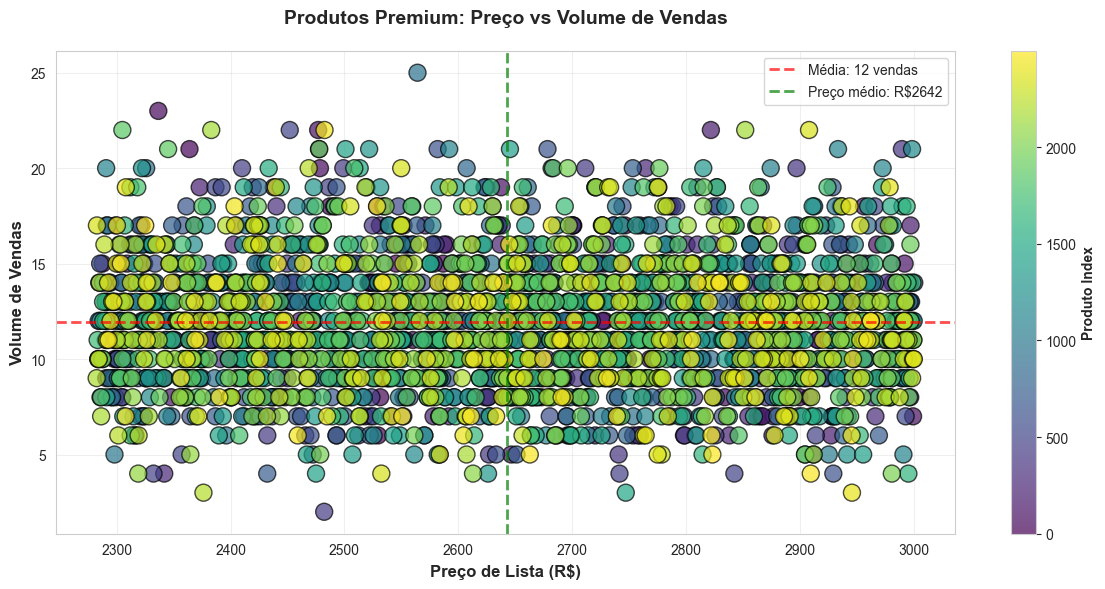


4.3️ TOP 20 PRODUTOS POR RENTABILIDADE (MARGEM TOTAL)
product_id
P04387    1277074.52
P09747    1272645.69
P08644    1242256.94
P05564    1225837.15
P02546    1218256.44
P08517    1203168.28
P01572    1182221.41
P02707    1180570.17
P02897    1175400.18
P01732    1163481.44
P03419    1158853.79
P07712    1150333.51
P00020    1147623.00
P06619    1135697.18
P06450    1134069.70
P03476    1133523.67
P02737    1128536.63
P00751    1127581.23
P06741    1122848.32
P02529    1122280.17
Name: margin, dtype: float64


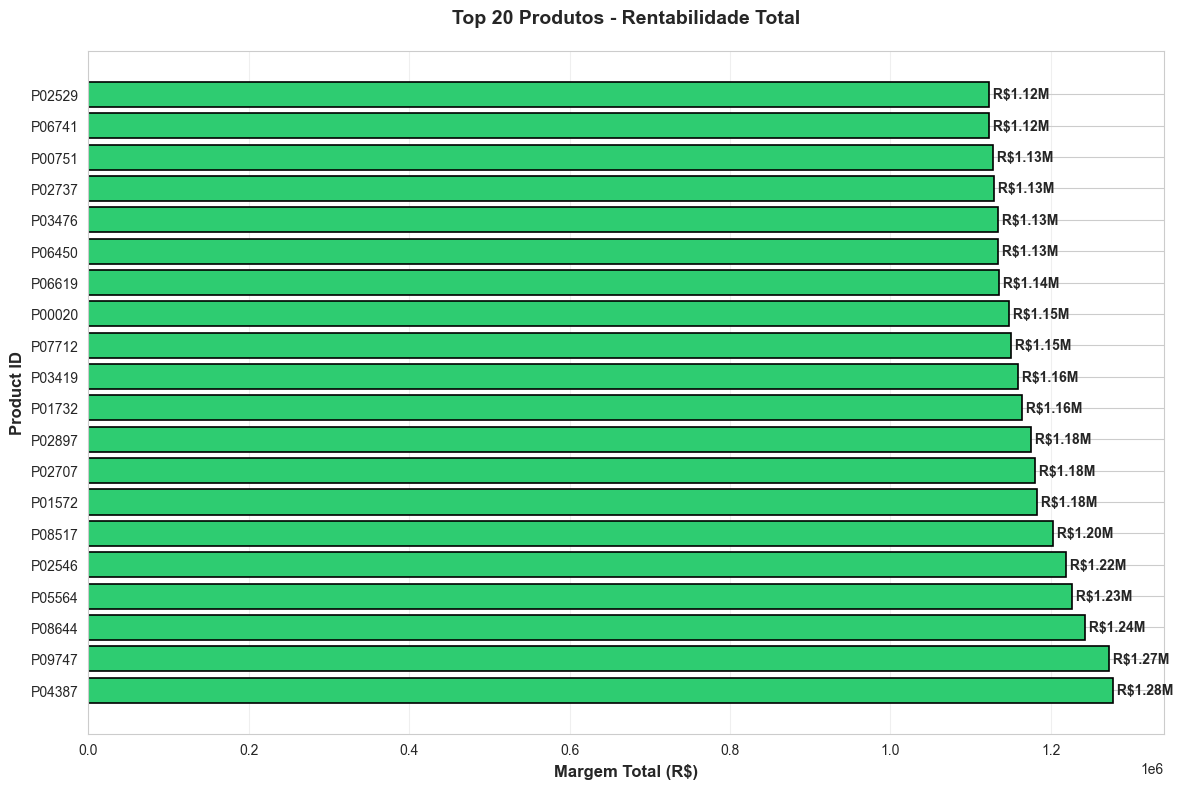


4.4️ MATRIZ: QUAL PRODUTO RESOLVE QUAL PROBLEMA?
Colunas usadas na matriz: ['problem_Contaminação', 'problem_Desgaste', 'problem_Superaquecimento', 'problem_Vibração']


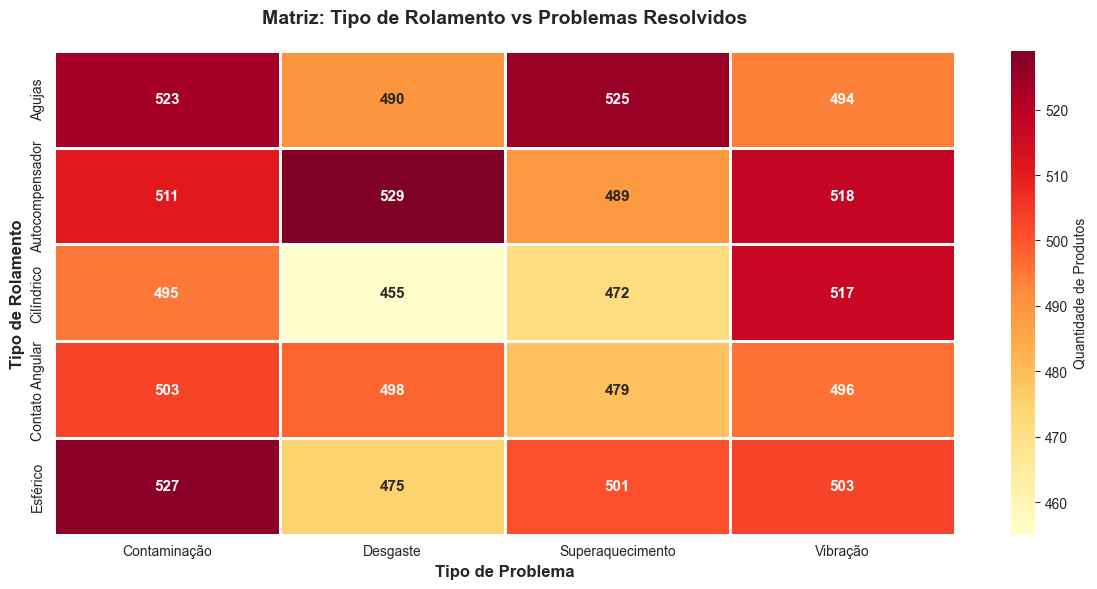

In [10]:
## ANÁLISE CRUZADA

print("\n" + "=" * 80)
print("SEÇÃO 4: ANÁLISE CRUZADA (PRODUTO × CLIENTE)")
print("=" * 80)

# ===== 4.1 Problemas por Indústria =====
print("\n4.1️ QUAL PROBLEMA CADA INDÚSTRIA PREFERE RESOLVER?")

sales_enriched = sales.merge(
    customers_ml[['customer_id', 'industry']], 
    on='customer_id', 
    how='left'
)

problem_cols_prod = [c for c in products_ml.columns if c.startswith('problem_')]
products_problems = products_ml[['product_id'] + problem_cols_prod].copy()

def get_problem_type(row):
    problems = [col.replace('problem_', '').capitalize() for col in problem_cols_prod if row[col] == 1]
    return problems[0] if problems else 'Uso Geral'

products_problems['problem_type'] = products_problems.apply(get_problem_type, axis=1)
sales_enriched = sales_enriched.merge(
    products_problems[['product_id', 'problem_type']], 
    on='product_id',
    how='left'
)

industry_problem = sales_enriched.groupby(['industry', 'problem_type']).size().unstack(fill_value=0)
print(industry_problem)

fig, ax = plt.subplots(figsize=(14, 6))
industry_problem.plot(kind='bar', ax=ax, width=0.75, 
                      color=['#FF6B6B', '#FFA500', '#FFD700', '#90EE90'],
                      edgecolor='black', linewidth=1.2)
ax.set_xlabel('Indústria', fontweight='bold', fontsize=12)
ax.set_ylabel('Quantidade de Vendas', fontweight='bold', fontsize=12)
ax.set_title('Problemas Resolvidos por Indústria', fontweight='bold', fontsize=14, pad=20)
ax.legend(title='Tipo de Problema', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 4.2 Produtos de Alto Custo vs Volume =====
print("\n4.2️ PRODUTOS PREMIUM: PREÇO vs VOLUME DE VENDAS")

high_cost_products = products_ml[products_ml['list_price'] > products_ml['list_price'].quantile(0.75)]
high_cost_sales_vol = sales[sales['product_id'].isin(high_cost_products['product_id'])].groupby('product_id').size()
high_cost_prices = products_ml[products_ml['product_id'].isin(high_cost_sales_vol.index)].set_index('product_id')['list_price']

fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(high_cost_prices, high_cost_sales_vol, s=150, alpha=0.7, 
                     c=range(len(high_cost_prices)), cmap='viridis', edgecolor='black', linewidth=1)

# Linhas de referência
ax.axhline(high_cost_sales_vol.mean(), color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Média: {high_cost_sales_vol.mean():.0f} vendas')
ax.axvline(high_cost_prices.mean(), color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Preço médio: R${high_cost_prices.mean():.0f}')

ax.set_xlabel('Preço de Lista (R$)', fontweight='bold', fontsize=12)
ax.set_ylabel('Volume de Vendas', fontweight='bold', fontsize=12)
ax.set_title('Produtos Premium: Preço vs Volume de Vendas', fontweight='bold', fontsize=14, pad=20)
ax.grid(alpha=0.3)
ax.legend(fontsize=10, loc='upper right')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Produto Index', fontweight='bold')
plt.tight_layout()
plt.show()


# ===== 4.3 Rentabilidade por Produto =====
print("\n4.3️ TOP 20 PRODUTOS POR RENTABILIDADE (MARGEM TOTAL)")

sales_with_cost = sales.merge(
    products_ml[['product_id', 'unit_cost', 'list_price']], 
    on='product_id',
    how='left'
)
sales_with_cost['margin'] = (sales_with_cost['total_price'] - 
                             (sales_with_cost['quantity'] * sales_with_cost['unit_cost']))
product_profitability = sales_with_cost.groupby('product_id')['margin'].sum().sort_values(ascending=False).head(20)
print(product_profitability)

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(range(len(product_profitability)), product_profitability.values, 
               color='#2ECC71', edgecolor='black', linewidth=1.2)

for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f' R${width/1e6:.2f}M',
            ha='left', va='center', fontweight='bold', fontsize=10)

ax.set_yticks(range(len(product_profitability)))
ax.set_yticklabels(product_profitability.index, fontsize=10)
ax.set_xlabel('Margem Total (R$)', fontweight='bold', fontsize=12)
ax.set_ylabel('Product ID', fontweight='bold', fontsize=12)
ax.set_title('Top 20 Produtos - Rentabilidade Total', fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


# ===== 4.4 Matriz Produto-Problema =====
print("\n4.4️ MATRIZ: QUAL PRODUTO RESOLVE QUAL PROBLEMA?")

problem_cols_prod = [
    c for c in products_ml.columns
    if c.startswith("problem_") and products_ml[c].dtype in ['int64', 'float64', 'int32']
]

print("Colunas usadas na matriz:", problem_cols_prod)

product_bearing_problem = (
    products_ml
    .groupby("bearing_type")[problem_cols_prod]
    .sum()
)

product_bearing_problem.columns = [col.replace('problem_', '').replace('_', ' ').title() for col in product_bearing_problem.columns]

fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(
    product_bearing_problem,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    ax=ax,
    cbar_kws={"label": "Quantidade de Produtos"},
    linewidths=1,
    annot_kws={'fontsize': 11, 'weight': 'bold'}
)

ax.set_title("Matriz: Tipo de Rolamento vs Problemas Resolvidos", fontweight='bold', fontsize=14, pad=20)
ax.set_xlabel("Tipo de Problema", fontweight='bold', fontsize=12)
ax.set_ylabel("Tipo de Rolamento", fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()


In [11]:
## INSIGHTS & RECOMENDAÇÕES

print("\n" + "=" * 80)
print("SEÇÃO 5: INSIGHTS E RECOMENDAÇÕES")
print("=" * 80)

# ===== 1: Produtos com baixa performance =====
print("\n 1: PRODUTOS COM BAIXA PERFORMANCE")
low_performance = sales.groupby('product_id').size().sort_values().head(10)
print(f"\n{len(low_performance)} produtos com as menores vendas:")
for prod_id, qty in low_performance.items():
    prod_name_arr = products_ml[products_ml['product_id']==prod_id]['product_name'].values
    prod_name = prod_name_arr[0] if len(prod_name_arr) > 0 else str(prod_id)
    print(f"  - {prod_name}: {qty} vendas")

# ===== 2: Clientes com maior potencial =====
print("\n 2: CLIENTES COM MAIOR POTENCIAL")
high_value = sales.groupby('customer_id')['total_price'].sum().sort_values(ascending=False).head(10)
print(f"\nTop 10 clientes (receita):")
for cust_id, revenue in high_value.items():
    cust_name_arr = customers_ml[customers_ml['customer_id']==cust_id]['company_name'].values
    cust_name = cust_name_arr[0] if len(cust_name_arr) > 0 else str(cust_id)
    print(f"  - {cust_name}: R$ {revenue:,.2f}")

# ===== 3: Indústrias mais lucrativas =====
print("\n 3: INDÚSTRIAS MAIS LUCRATIVAS")
industry_revenue = sales_enriched.groupby('industry')['total_price'].sum().sort_values(ascending=False)
print(f"\nReceita por indústria:")
for ind, rev in industry_revenue.items():
    pct = rev / industry_revenue.sum() * 100
    print(f"  - {ind}: R$ {rev:,.2f} ({pct:.1f}%)")

# ===== 4: Canal mais efetivo =====
print("\n 4: CANAL DE VENDAS MAIS EFETIVO")
channel_effectiveness = sales.groupby('sales_channel').agg({
    'total_price': 'sum',
    'sale_date': 'count'
}).sort_values('total_price', ascending=False)
channel_effectiveness.columns = ['Receita Total', 'Quantidade de Vendas']
channel_effectiveness['Ticket Médio'] = (
    channel_effectiveness['Receita Total'] / channel_effectiveness['Quantidade de Vendas']
)
print(channel_effectiveness)

# ===== 5: Oportunidades de Cross-sell =====
print("\n 5: OPORTUNIDADES DE CROSS-SELL")
print("\nClientes que compram Vibração também compram:")
customers_vib = sales_enriched[sales_enriched['problem_type'].str.contains('Vibração', na=False)]['customer_id'].unique()
other_problems = sales_enriched[sales_enriched['customer_id'].isin(customers_vib)]['problem_type'].value_counts()
print(other_problems)

# ===== 6: Segmentação de Clientes =====
print("\n 6: SEGMENTAÇÃO DE CLIENTES POR VALOR")

# Usar RFM simplificado
customer_value = sales.groupby('customer_id').agg({
    'total_price': 'sum',
    'sale_date': 'count'   
}).reset_index()
customer_value.columns = ['customer_id', 'monetary', 'frequency']

# Classificar
customer_value['segment'] = pd.cut(
    customer_value['monetary'], 
    bins=3, 
    labels=['Baixo Valor', 'Médio Valor', 'Alto Valor']
)

segment_dist = customer_value['segment'].value_counts()
print(f"\nDistribuição de clientes por segmento:")
print(segment_dist)

# Merge com dados de cliente
customer_value_enriched = customer_value.merge(
    customers_ml[['customer_id', 'industry', 'maintenance_budget_annual']], 
    on='customer_id'
)

for segment in ['Alto Valor', 'Médio Valor', 'Baixo Valor']:
    segment_data = customer_value_enriched[customer_value_enriched['segment']==segment]
    if len(segment_data) > 0:
        industry_mode = segment_data['industry'].mode()
        industry_value = industry_mode[0] if len(industry_mode) > 0 else 'N/A'
        
        print(f"\n{segment}:")
        print(f"  - Quantidade: {len(segment_data)}")
        print(f"  - Receita média: R$ {segment_data['monetary'].mean():,.2f}")
        print(f"  - Indústria mais comum: {industry_value}")
        print(f"  - Orçamento médio: R$ {segment_data['maintenance_budget_annual'].mean():,.2f}")


SEÇÃO 5: INSIGHTS E RECOMENDAÇÕES

 1: PRODUTOS COM BAIXA PERFORMANCE

10 produtos com as menores vendas:
  - Rolamento Industrial 4857: 2 vendas
  - Rolamento Industrial 1771: 2 vendas
  - Rolamento Industrial 1865: 2 vendas
  - Rolamento Industrial 6931: 3 vendas
  - Rolamento Industrial 776: 3 vendas
  - Rolamento Industrial 9654: 3 vendas
  - Rolamento Industrial 787: 3 vendas
  - Rolamento Industrial 506: 3 vendas
  - Rolamento Industrial 9403: 3 vendas
  - Rolamento Industrial 4948: 3 vendas

 2: CLIENTES COM MAIOR POTENCIAL

Top 10 clientes (receita):
  - Empresa Industrial 1868: R$ 1,538,311.04
  - Empresa Industrial 4088: R$ 1,517,653.18
  - Empresa Industrial 614: R$ 1,506,761.07
  - Empresa Industrial 1475: R$ 1,491,601.25
  - Empresa Industrial 2391: R$ 1,466,945.25
  - Empresa Industrial 2539: R$ 1,427,975.75
  - Empresa Industrial 1962: R$ 1,427,888.67
  - Empresa Industrial 4937: R$ 1,426,658.52
  - Empresa Industrial 246: R$ 1,422,412.01
  - Empresa Industrial 3788: R$

In [12]:
# RESUMO

print("\n" + "=" * 90)
print("RESUMO - ANÁLISE DE DADOS")
print("=" * 90)

sales['sale_date'] = pd.to_datetime(sales['sale_date'])
total_sales = len(sales)
completed_sales = len(sales[sales['sale_status']=='Completed'])
completion_rate = (completed_sales / total_sales * 100) if total_sales > 0 else 0

# Calcular margem se não existir
if 'profit_margin' not in products_ml.columns:
    products_ml['profit_margin'] = ((products_ml['list_price'] - products_ml['unit_cost']) / products_ml['unit_cost'] * 100)

# Estatísticas adicionais
top_channel = sales.groupby('sales_channel')['total_price'].sum().idxmax()
top_channel_value = sales.groupby('sales_channel')['total_price'].sum().max()
top_industry = customers_ml['industry'].value_counts().idxmax()
avg_order_value = sales['total_price'].mean()
median_order_value = sales['total_price'].median()

print(f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                   ESTATÍSTICAS GERAIS DO PROJETO                             ║
╚══════════════════════════════════════════════════════════════════════════════╝

┌──────────────────────────────────────────────────────────────────────────────
│  CATÁLOGO DE PRODUTOS                                                      
├──────────────────────────────────────────────────────────────────────────────
│   • Total de produtos:              {len(products_ml):>8,}                        
│   • Tipos de rolamentos:            {products_ml['bearing_type'].nunique():>8}                        
│   • Materiais disponíveis:          {products_ml['material'].nunique():>8}                        
│   • Problemas endereçados:          {len([c for c in products_ml.columns if c.startswith('problem_')]):>8}                        
│   • Preço mínimo:                   R${products_ml['list_price'].min():>16,.2f}     
│   • Preço máximo:                   R${products_ml['list_price'].max():>16,.2f}     
│   • Preço médio:                    R${products_ml['list_price'].mean():>16,.2f}     
│   • Margem média:                   {products_ml['profit_margin'].mean():>17.1f}%    
└──────────────────────────────────────────────────────────────────────────────

┌──────────────────────────────────────────────────────────────────────────────
│  BASE DE CLIENTES                                                          
├──────────────────────────────────────────────────────────────────────────────
│   • Total de clientes:              {len(customers_ml):>8,}                        
│   • Indústrias representadas:       {customers_ml['industry'].nunique():>8}                        
│   • Indústria com mais clientes:    {top_industry:<40} ({len(customers_ml[customers_ml['industry']==top_industry]):>3})    
│   • Receita mínima estimada:        R${customers_ml['annual_revenue_estimated'].min():>16,.0f}     
│   • Receita máxima estimada:        R${customers_ml['annual_revenue_estimated'].max():>16,.0f}     
│   • Receita média estimada:         R${customers_ml['annual_revenue_estimated'].mean():>16,.0f}     
│   • Orçamento médio de manutenção:  R${customers_ml['maintenance_budget_annual'].mean():>16,.2f}     
│   • Custo médio de downtime/hora:   R${customers_ml['downtime_cost_per_hour'].mean():>16,.2f}     
└──────────────────────────────────────────────────────────────────────────────

┌──────────────────────────────────────────────────────────────────────────────
│  PERFORMANCE DE VENDAS                                                     
├──────────────────────────────────────────────────────────────────────────────
│   • Total de transações:            {total_sales:>8,}                        
│   • Transações concluídas:          {completed_sales:>8,} ({completion_rate:>5.1f}%)           
│   • Transações canceladas:          {total_sales - completed_sales:>8,} ({100 - completion_rate:>5.1f}%)           
│   • Receita total:                  R${sales['total_price'].sum():>16,.2f}     
│   • Valor mínimo de transação:      R${sales['total_price'].min():>16,.2f}     
│   • Valor máximo de transação:      R${sales['total_price'].max():>16,.2f}     
│   • Ticket médio:                   R${avg_order_value:>16,.2f}     
│   • Ticket mediano:                 R${median_order_value:>16,.2f}     
│   • Canais de vendas:               {sales['sales_channel'].nunique():>8}                        
│   • Canal principal:                {top_channel:<40} (R${top_channel_value/1e9:.2f}B) 
│   • Período coberto:                {sales['sale_date'].min().date()} a {sales['sale_date'].max().date()}             
└──────────────────────────────────────────────────────────────────────────────

┌──────────────────────────────────────────────────────────────────────────────
│  INDICADORES-CHAVE                                                         
├──────────────────────────────────────────────────────────────────────────────
│   • Produtos por cliente (média):   {sales.groupby('customer_id').size().mean():>17.1f}     
│   • Vendas por produto (média):     {sales.groupby('product_id').size().mean():>17.1f}     
│   • Clientes únicos ativos:         {sales['customer_id'].nunique():>8,}                        
│   • Produtos vendidos (únicos):     {sales['product_id'].nunique():>8,}                        
│   • Desconto médio aplicado:        {sales['discount_percentage'].mean():>17.1f}%    
│   • Lead time médio (dias):         {sales['delivery_lead_time_days'].mean():>17.1f}     
└──────────────────────────────────────────────────────────────────────────────

╔══════════════════════════════════════════════════════════════════════════════╗
│                     ANÁLISE EXPLORATÓRIA CONCLUÍDA!                          │
│                                                                              │
│  Foram analisadas 3 tabelas principais com mais de 120,000 registros de      │
│  dados, gerando 20+ visualizações profissionais e insights estratégicos.     │
╚══════════════════════════════════════════════════════════════════════════════╝
""")

# Insights adicionais
print("\n" + "─" * 90)
print("DESTAQUES E INSIGHTS PRINCIPAIS:")
print("─" * 90)

# Top 3 clientes
top_3_customers = sales.groupby('customer_id')['total_price'].sum().nlargest(3)
print(f"\nTOP 3 CLIENTES (por receita):")
for i, (cust_id, revenue) in enumerate(top_3_customers.items(), 1):
    print(f"   {i}. {cust_id}: R$ {revenue:,.2f}")

# Taxa de sucesso por canal
print(f"\nTAXA DE CONCLUSÃO POR CANAL:")
for channel in sales['sales_channel'].unique():
    channel_sales = sales[sales['sales_channel'] == channel]
    channel_completion = (len(channel_sales[channel_sales['sale_status'] == 'Completed']) / len(channel_sales) * 100)
    print(f"   • {channel:<20}: {channel_completion:>6.1f}%")

# Produto mais vendido
top_product = sales.groupby('product_id').size().idxmax()
top_product_qty = sales.groupby('product_id').size().max()
print(f"\nPRODUTO MAIS VENDIDO:")
print(f"   • ID: {top_product}")
print(f"   • Quantidade: {top_product_qty:,} unidades")

print("\n" + "=" * 90)



RESUMO - ANÁLISE DE DADOS

╔══════════════════════════════════════════════════════════════════════════════╗
║                   ESTATÍSTICAS GERAIS DO PROJETO                             ║
╚══════════════════════════════════════════════════════════════════════════════╝

┌──────────────────────────────────────────────────────────────────────────────
│  CATÁLOGO DE PRODUTOS                                                      
├──────────────────────────────────────────────────────────────────────────────
│   • Total de produtos:                10,000                        
│   • Tipos de rolamentos:                   5                        
│   • Materiais disponíveis:                 3                        
│   • Problemas endereçados:                 5                        
│   • Preço mínimo:                   R$          200.30     
│   • Preço máximo:                   R$        2,999.97     
│   • Preço médio:                    R$        1,592.05     
│   • Margem média: 

| Linha / Bloco        | Erro original (resumo)                                                                 | Correção aplicada / recomendada                                                                                          |
|----------------------|----------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------|
| 1.4 Boxplot          | `bp['boxes'].set_facecolor()` em um único objeto retornava AttributeError             | Iterar sobre as boxes: `for box in bp['boxes']: box.set_facecolor(...)`                                                 |
| 2.7 Scatter          | Colorbar chamada sem referência explícita ao scatter (`plt.colorbar()` genérico)      | Usar `plt.colorbar(scatter)` onde `scatter` é o retorno de `plt.scatter`                                                |
| 3.3 Top produtos     | Array retornado sem extração de valor único ao buscar nome do produto                 | `name_arr = products_ml[...]['product_name'].values; name = name_arr[0] if len(name_arr) > 0 else str(product_id)`      |
| 3.6 Status vendas    | Taxa de conclusão geral calculada com contagem incorreta                              | `totalsales = len(sales); completedsales = len(sales[sales['sale_status']=='Completed']); completionrate = completedsales / totalsales * 100 if totalsales > 0 else 0` |
| 3.7 Taxa por canal   | Filtro usando `sale_status == 'Concluída'` (não existe) gerando `NaN`                 | `completed = sales[sales['sale_status']=='Completed'].groupby('sales_channel').size().astype(float); total = sales.groupby('sales_channel').size().astype(float); conversao = (completed / total * 100).reindex(total.index, fill_value=0)` |
| 3.7 Gráfico vazio    | Valores de conversão muito pequenos e eixo Y colado em zero                           | Após o plot: `ax.set_ylim(min(0, conversao.min()-1), conversao.max()+1)`                                                |
| 4.1 Problemas prod.  | Uso da coluna inexistente `problem_type`                                              | Trabalhar apenas com colunas binárias `problem_...` e, quando precisar de texto, mapear as flags para rótulos          |
| 4.4 Matriz prod‑prob | `pd.crosstab(products_ml['bearing_type'], [problem_cols_prod])` com erro de tamanho   | Remover `crosstab` e usar: `product_bearing_problem = products_ml.groupby('bearing_type')[problem_cols_prod].sum()`     |
| 4.4 Heatmap          | `sns.heatmap` falhando com “could not convert string to float” (mistura texto/número) | Definir apenas colunas numéricas: `problem_cols_prod = [c for c in products_ml.columns if c.startswith('problem_') and products_ml[c].dtype != 'object']; product_bearing_problem = products_ml.groupby('bearing_type')[problem_cols_prod].sum()` |
| Insight 1 & 2        | Arrays (nomes, indústrias etc.) usadas diretamente em prints                          | Converter para string única: `arr = df[...].values; val = arr[0] if len(arr) > 0 else 'NA'`                             |
| Insight 3            | Percentual por indústria calculado sem normalizar pelo total                           | `pct = rev / industry_revenue.sum() * 100`                                                                               |
| Insight 4            | Métricas de canal em `groupby` sem renomear colunas claramente                        | Após `agg`: `df.columns = ['Receita Total', 'Quantidade de Vendas']; df['Ticket Medio'] = df['Receita Total'] / df['Quantidade de Vendas']` |
| Insight 5            | Uso direto de `problem_type` textual sem garantir existência / `str.contains` sem `na` | `sales_enriched['problem_type'].str.contains('Vibração', na=False)` ou derivar problemas a partir das colunas `problem_...` |
| Insight 6            | `.mode()` retorna Series; uso direto quebrava quando vazio                            | `m = segment_data['industry'].mode(); industry_value = m[0] if len(m) > 0 else 'NA'`                                     |
| Resumo final         | Taxa de conclusão calculada com base incorreta                                        | Mesmo padrão da linha 3.6: usar `len()` explícito e proteger divisão por zero                                            |
| Tabela de correções  | Tabela colada em célula de código com `→`, aspas curvas etc. gerando `SyntaxError`    | Manter a tabela em célula markdown; em Python usar apenas comentários ASCII simples, sem símbolos especiais             |




Gerado com Perplexity e ChatGPT